In [1]:
import ray
import pandas as pd
import shap
from quarkml.feature_engineering import FeatureEngineering
from quarkml.model_engineering import ModelEngineering
from quarkml.distributed_engineering import DistributedEngineering

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
FE = FeatureEngineering()
ME = ModelEngineering()
DE = DistributedEngineering()

In [3]:
# 数据处理
ds = pd.read_csv("credit.csv")
ds, cat, con = FE.data_processing_fit(ds, 'class')

2023-10-08 14:50:44.247 | INFO     | quarkml.feature_engineering:data_processing_fit:63 - *************** [data_processing_fit] cost time: 0.019385099411010742 ***************


In [4]:
# 特征衍生
ds = FE.feature_generation(ds, 'class', cat, is_filter=True)

2023-10-08 14:50:52.273 | INFO     | quarkml.generator.baisc_operation:fit:56 - ===== 【categorical_features】: ['age', 'checking_status', 'credit_amount', 'credit_history', 'credit_real', 'duration', 'employment', 'existing_credits', 'german_credit', 'housing', 'installment_commitment', 'job', 'num_dependents', 'other_parties', 'other_payment_plans', 'own_telephone', 'personal_status', 'property_magnitude', 'residence_since'] =====
2023-10-08 14:50:52.274 | INFO     | quarkml.generator.baisc_operation:fit:57 - ===== 【numerical_features】: ['purpose'] =====
2023-10-08 14:50:52.298 | INFO     | quarkml.core.feature_generation:basic_generation:87 - ===== candidate_features number: 825 =====
2023-10-08 14:50:52.353 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf':

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.920348	valid_1's auc: 0.777819
[200]	training's auc: 0.961397	valid_1's auc: 0.777451
[300]	training's auc: 0.978855	valid_1's auc: 0.768495
Early stopping, best iteration is:
[127]	training's auc: 0.936698	valid_1's auc: 0.782603
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.92465	valid_1's auc: 0.782998
[200]	training's auc: 0.964861	valid_1's auc: 0.784051
[300]	training's auc: 0.982923	valid_1's auc: 0.783129
[400]	training's auc: 0.991166	valid_1's auc: 0.797342


2023-10-08 14:50:52.676 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.18805551528930664 ************************************
2023-10-08 14:50:52.693 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:52.759 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07074737548828125 ************************************
2023-10-08 14:50:52.775 | INFO     | quarkml.mode

[500]	training's auc: 0.994971	valid_1's auc: 0.796947
[600]	training's auc: 0.997485	valid_1's auc: 0.802079
[700]	training's auc: 0.998389	valid_1's auc: 0.800237
Early stopping, best iteration is:
[582]	training's auc: 0.997048	valid_1's auc: 0.805369
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.934928	valid_1's auc: 0.77752
[200]	training's auc: 0.968845	valid_1's auc: 0.767784
Early stopping, best iteration is:
[39]	training's auc: 0.875052	valid_1's auc: 0.796991
Training until validation scores don't improve for 200 rounds


2023-10-08 14:50:52.917 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.14689922332763672 ************************************
2023-10-08 14:50:52.934 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************


[100]	training's auc: 0.927084	valid_1's auc: 0.736793
[200]	training's auc: 0.965108	valid_1's auc: 0.733637
[300]	training's auc: 0.981728	valid_1's auc: 0.746494
[400]	training's auc: 0.990109	valid_1's auc: 0.748247
[500]	training's auc: 0.995215	valid_1's auc: 0.74252
Early stopping, best iteration is:
[394]	training's auc: 0.989451	valid_1's auc: 0.752104
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.929392	valid_1's auc: 0.766128
[200]	training's auc: 0.969481	valid_1's auc: 0.771317
[300]	training's auc: 0.983144	valid_1's auc: 0.772851


2023-10-08 14:50:53.030 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.10139131546020508 ************************************
2023-10-08 14:50:53.139 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:53.155 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01631307601928711 ************************************
2023-10-08 14:50:53.157 | INFO     | quarkml.mode

Early stopping, best iteration is:
[182]	training's auc: 0.96385	valid_1's auc: 0.779337
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:53.252 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:53.268 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016771316528320312 ************************************
2023-10-08 14:50:53.270 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.740741	valid_1's auc: 0.766234
[200]	training's auc: 0.74109	valid_1's auc: 0.766234
Early stopping, best iteration is:
[2]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.733578	valid_1's auc: 0.809524


2023-10-08 14:50:53.484 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:53.500 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015470743179321289 ************************************
2023-10-08 14:50:53.502 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.742488	valid_1's auc: 0.757576
[200]	training's auc: 0.741789	valid_1's auc: 0.757576
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.735674	valid_1's auc: 0.800866
[200]	training's auc: 0.735674	valid_1's auc: 0.800866
Early stopping, best iteration is:
[1]	training's auc: 0.732879	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732879	valid_1's auc: 0.805195


2023-10-08 14:50:53.709 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:53.723 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013921976089477539 ************************************
2023-10-08 14:50:53.725 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.744759	valid_1's auc: 0.787879
[200]	training's auc: 0.744934	valid_1's auc: 0.779221
Early stopping, best iteration is:
[1]	training's auc: 0.733753	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733753	valid_1's auc: 0.805195


2023-10-08 14:50:53.945 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:53.962 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.017268657684326172 ************************************
2023-10-08 14:50:53.964 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:54.175 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:54.192 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.017006874084472656 ************************************
2023-10-08 14:50:54.194 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.737596	valid_1's auc: 0.809524
[200]	training's auc: 0.737596	valid_1's auc: 0.809524
Early stopping, best iteration is:
[32]	training's auc: 0.736198	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	training's auc: 0.736198	valid_1's auc: 0.813853
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734626	valid_1's auc: 0.805195
[200]	training's auc: 0.734626	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:54.402 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:54.418 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016180038452148438 ************************************
2023-10-08 14:50:54.420 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732006	valid_1's auc: 0.805195
[200]	training's auc: 0.732006	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.792977	valid_1's auc: 0.787879
[200]	training's auc: 0.803809	valid_1's auc: 0.761905
Early stopping, best iteration is:
[2]	training's auc: 0.741789	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.741789	valid_1's auc: 0.818182


2023-10-08 14:50:54.627 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:54.645 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01804947853088379 ************************************
2023-10-08 14:50:54.647 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.739343	valid_1's auc: 0.766234
[200]	training's auc: 0.739867	valid_1's auc: 0.766234
Early stopping, best iteration is:
[2]	training's auc: 0.73218	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.73218	valid_1's auc: 0.813853
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:54.850 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:54.864 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014495372772216797 ************************************
2023-10-08 14:50:54.866 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:55.071 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:55.089 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01770782470703125 ************************************
2023-10-08 14:50:55.091 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.789658	valid_1's auc: 0.761905
[200]	training's auc: 0.797519	valid_1's auc: 0.766234
Early stopping, best iteration is:
[1]	training's auc: 0.738644	valid_1's auc: 0.796537
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.738644	valid_1's auc: 0.796537
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:55.302 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:55.317 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01512289047241211 ************************************
2023-10-08 14:50:55.319 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732006	valid_1's auc: 0.805195
[200]	training's auc: 0.732006	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:55.527 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:55.544 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016746997833251953 ************************************
2023-10-08 14:50:55.546 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.744759	valid_1's auc: 0.787879
[200]	training's auc: 0.744934	valid_1's auc: 0.779221
Early stopping, best iteration is:
[1]	training's auc: 0.733753	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733753	valid_1's auc: 0.805195


2023-10-08 14:50:55.756 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:55.773 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016434431076049805 ************************************
2023-10-08 14:50:55.775 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734801	valid_1's auc: 0.796537
[200]	training's auc: 0.735325	valid_1's auc: 0.792208
Early stopping, best iteration is:
[1]	training's auc: 0.733054	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733054	valid_1's auc: 0.800866


2023-10-08 14:50:55.984 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:56.001 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016362667083740234 ************************************
2023-10-08 14:50:56.002 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.759783	valid_1's auc: 0.731602
[200]	training's auc: 0.761356	valid_1's auc: 0.722944
Early stopping, best iteration is:
[1]	training's auc: 0.733578	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733578	valid_1's auc: 0.813853
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734976	valid_1's auc: 0.787879
[200]	training's auc: 0.734801	valid_1's auc: 0.78355
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524


2023-10-08 14:50:56.209 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:56.225 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016351699829101562 ************************************
2023-10-08 14:50:56.227 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.739343	valid_1's auc: 0.805195
[200]	training's auc: 0.741614	valid_1's auc: 0.805195
[300]	training's auc: 0.743885	valid_1's auc: 0.809524
Early stopping, best iteration is:
[170]	training's auc: 0.743711	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195


2023-10-08 14:50:56.446 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:56.463 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016965866088867188 ************************************
2023-10-08 14:50:56.465 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.787037	valid_1's auc: 0.787879
[200]	training's auc: 0.787037	valid_1's auc: 0.787879
Early stopping, best iteration is:
[2]	training's auc: 0.73515	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.73515	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.745108	valid_1's auc: 0.770563
[200]	training's auc: 0.745108	valid_1's auc: 0.770563
Early stopping, best iteration is:
[1]	training's auc: 0.734801	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734801	valid_1's auc: 0.800866


2023-10-08 14:50:56.666 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:56.683 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01700735092163086 ************************************
2023-10-08 14:50:56.685 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.743012	valid_1's auc: 0.800866
[200]	training's auc: 0.743012	valid_1's auc: 0.800866
Early stopping, best iteration is:
[4]	training's auc: 0.737945	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	training's auc: 0.737945	valid_1's auc: 0.809524


2023-10-08 14:50:56.889 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:56.905 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01616191864013672 ************************************
2023-10-08 14:50:56.907 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.733403	valid_1's auc: 0.805195
[200]	training's auc: 0.73515	valid_1's auc: 0.809524
Early stopping, best iteration is:
[17]	training's auc: 0.733229	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	training's auc: 0.733229	valid_1's auc: 0.809524


2023-10-08 14:50:57.124 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:57.137 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013753652572631836 ************************************
2023-10-08 14:50:57.139 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.775681	valid_1's auc: 0.744589
[200]	training's auc: 0.77673	valid_1's auc: 0.727273
Early stopping, best iteration is:
[1]	training's auc: 0.736723	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.736723	valid_1's auc: 0.800866


2023-10-08 14:50:57.353 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:57.367 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014457225799560547 ************************************
2023-10-08 14:50:57.369 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732355	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732355	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.780398	valid_1's auc: 0.800866
[200]	training's auc: 0.786513	valid_1's auc: 0.796537
Early stopping, best iteration is:
[1]	training's auc: 0.734801	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734801	valid_1's auc: 0.809524


2023-10-08 14:50:57.585 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:57.601 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016111135482788086 ************************************
2023-10-08 14:50:57.603 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.739518	valid_1's auc: 0.774892
[200]	training's auc: 0.739693	valid_1's auc: 0.774892
Early stopping, best iteration is:
[1]	training's auc: 0.732879	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732879	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.736548	valid_1's auc: 0.800866
[200]	training's auc: 0.736897	valid_1's auc: 0.796537
Early stopping, best iteration is:
[9]	training's auc: 0.734451	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.734451	valid_1's auc: 0.805195


2023-10-08 14:50:57.811 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:57.826 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014631986618041992 ************************************
2023-10-08 14:50:57.828 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.73253	valid_1's auc: 0.805195
[200]	training's auc: 0.733229	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732879	valid_1's auc: 0.800866
[200]	training's auc: 0.734451	valid_1's auc: 0.800866
Early stopping, best iteration is:
[3]	training's auc: 0.733927	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	training's auc: 0.733927	valid_1's auc: 0.805195


2023-10-08 14:50:58.034 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:58.050 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01559901237487793 ************************************
2023-10-08 14:50:58.052 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.746681	valid_1's auc: 0.766234
[200]	training's auc: 0.746855	valid_1's auc: 0.761905
Early stopping, best iteration is:
[2]	training's auc: 0.733403	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.733403	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.804158	valid_1's auc: 0.787879
[200]	training's auc: 0.804158	valid_1's auc: 0.787879
Early stopping, best iteration is:
[26]	training's auc: 0.782145	valid_1's auc: 0.822511
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	training's auc: 0.782145	valid_1's auc: 0.822511


2023-10-08 14:50:58.261 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:58.273 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.012795448303222656 ************************************
2023-10-08 14:50:58.275 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.747904	valid_1's auc: 0.796537
[200]	training's auc: 0.747904	valid_1's auc: 0.796537
Early stopping, best iteration is:
[11]	training's auc: 0.739867	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	training's auc: 0.739867	valid_1's auc: 0.818182
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:58.474 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:58.489 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015397310256958008 ************************************
2023-10-08 14:50:58.491 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.73847	valid_1's auc: 0.809524
[200]	training's auc: 0.73812	valid_1's auc: 0.809524
Early stopping, best iteration is:
[33]	training's auc: 0.734102	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734451	valid_1's auc: 0.805195
[200]	training's auc: 0.734626	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.731831	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.731831	valid_1's auc: 0.809524


2023-10-08 14:50:58.689 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:58.706 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016286373138427734 ************************************
2023-10-08 14:50:58.707 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.735325	valid_1's auc: 0.796537
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[42]	training's auc: 0.733927	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:58.915 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:58.929 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014745235443115234 ************************************
2023-10-08 14:50:58.931 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.751922	valid_1's auc: 0.727273
[200]	training's auc: 0.751922	valid_1's auc: 0.727273
Early stopping, best iteration is:
[1]	training's auc: 0.734976	valid_1's auc: 0.796537
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734976	valid_1's auc: 0.796537
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:59.134 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:59.148 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014485597610473633 ************************************
2023-10-08 14:50:59.150 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.740741	valid_1's auc: 0.766234
[200]	training's auc: 0.74109	valid_1's auc: 0.766234
Early stopping, best iteration is:
[2]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:59.354 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:59.369 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01563262939453125 ************************************
2023-10-08 14:50:59.371 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.739343	valid_1's auc: 0.766234
[200]	training's auc: 0.739867	valid_1's auc: 0.766234
Early stopping, best iteration is:
[2]	training's auc: 0.73218	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.73218	valid_1's auc: 0.813853
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734626	valid_1's auc: 0.805195
[200]	training's auc: 0.734626	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:50:59.576 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:59.589 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.012511730194091797 ************************************
2023-10-08 14:50:59.591 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.742313	valid_1's auc: 0.761905
[200]	training's auc: 0.742313	valid_1's auc: 0.761905
Early stopping, best iteration is:
[1]	training's auc: 0.734626	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734626	valid_1's auc: 0.800866
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.74406	valid_1's auc: 0.800866
[200]	training's auc: 0.745458	valid_1's auc: 0.800866
Early stopping, best iteration is:
[44]	training's auc: 0.737771	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	training's auc: 0.736897	valid_1's auc: 0.809524


2023-10-08 14:50:59.798 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:50:59.814 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015943288803100586 ************************************
2023-10-08 14:50:59.815 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:00.015 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:00.029 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014460086822509766 ************************************
2023-10-08 14:51:00.031 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.742488	valid_1's auc: 0.757576
[200]	training's auc: 0.741789	valid_1's auc: 0.757576
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.754892	valid_1's auc: 0.757576
[200]	training's auc: 0.757512	valid_1's auc: 0.748918
Early stopping, best iteration is:
[1]	training's auc: 0.735674	valid_1's auc: 0.796537
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.735674	valid_1's auc: 0.796537


2023-10-08 14:51:00.235 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:00.251 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015201568603515625 ************************************
2023-10-08 14:51:00.252 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734626	valid_1's auc: 0.796537
[200]	training's auc: 0.734626	valid_1's auc: 0.796537
Early stopping, best iteration is:
[7]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:00.458 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:00.472 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013678789138793945 ************************************
2023-10-08 14:51:00.474 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.749825	valid_1's auc: 0.770563
[200]	training's auc: 0.749825	valid_1's auc: 0.770563
Early stopping, best iteration is:
[1]	training's auc: 0.736548	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.736548	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:00.677 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:00.693 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01630997657775879 ************************************
2023-10-08 14:51:00.694 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.733753	valid_1's auc: 0.805195
[200]	training's auc: 0.734102	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:00.901 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:00.916 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015015363693237305 ************************************
2023-10-08 14:51:00.918 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.746681	valid_1's auc: 0.787879
[200]	training's auc: 0.750699	valid_1's auc: 0.787879
Early stopping, best iteration is:
[1]	training's auc: 0.734801	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734801	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734626	valid_1's auc: 0.805195
[200]	training's auc: 0.734626	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:01.119 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:01.133 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014840841293334961 ************************************
2023-10-08 14:51:01.135 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.736548	valid_1's auc: 0.787879
[200]	training's auc: 0.736548	valid_1's auc: 0.787879
Early stopping, best iteration is:
[1]	training's auc: 0.734102	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734102	valid_1's auc: 0.800866


2023-10-08 14:51:01.338 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:01.352 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01407313346862793 ************************************
2023-10-08 14:51:01.353 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.753319	valid_1's auc: 0.770563
[200]	training's auc: 0.753319	valid_1's auc: 0.770563
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:01.563 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:01.575 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.012589454650878906 ************************************
2023-10-08 14:51:01.577 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.74144	valid_1's auc: 0.800866
[200]	training's auc: 0.74144	valid_1's auc: 0.800866
Early stopping, best iteration is:
[5]	training's auc: 0.737247	valid_1's auc: 0.822511
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	training's auc: 0.737247	valid_1's auc: 0.822511
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:01.776 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:01.792 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01550149917602539 ************************************
2023-10-08 14:51:01.794 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.749476	valid_1's auc: 0.796537
[200]	training's auc: 0.75	valid_1's auc: 0.800866
Early stopping, best iteration is:
[2]	training's auc: 0.736548	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.736548	valid_1's auc: 0.818182
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734976	valid_1's auc: 0.787879
[200]	training's auc: 0.734801	valid_1's auc: 0.78355
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524


2023-10-08 14:51:02.003 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:02.020 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.017008543014526367 ************************************
2023-10-08 14:51:02.022 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.782495	valid_1's auc: 0.744589
[200]	training's auc: 0.793326	valid_1's auc: 0.731602
Early stopping, best iteration is:
[1]	training's auc: 0.734626	valid_1's auc: 0.796537
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734626	valid_1's auc: 0.796537
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.761356	valid_1's auc: 0.857143
[200]	training's auc: 0.767645	valid_1's auc: 0.839827
Early stopping, best iteration is:
[95]	training's auc: 0.760657	valid_1's auc: 0.857143
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	training's auc: 0.753145	valid_1's auc: 0.852814


2023-10-08 14:51:02.235 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:02.251 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016527414321899414 ************************************
2023-10-08 14:51:02.253 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.777428	valid_1's auc: 0.809524
[200]	training's auc: 0.789133	valid_1's auc: 0.792208
Early stopping, best iteration is:
[14]	training's auc: 0.752271	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	training's auc: 0.752271	valid_1's auc: 0.818182


2023-10-08 14:51:02.463 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:02.479 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015813112258911133 ************************************
2023-10-08 14:51:02.480 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.746681	valid_1's auc: 0.748918
[200]	training's auc: 0.749476	valid_1's auc: 0.74026
Early stopping, best iteration is:
[3]	training's auc: 0.733927	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	training's auc: 0.733927	valid_1's auc: 0.818182
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:02.680 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:02.694 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014721870422363281 ************************************
2023-10-08 14:51:02.696 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.738295	valid_1's auc: 0.744589
[200]	training's auc: 0.739518	valid_1's auc: 0.744589
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:02.904 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:02.916 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.012164831161499023 ************************************
2023-10-08 14:51:02.917 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.755765	valid_1's auc: 0.779221
[200]	training's auc: 0.762928	valid_1's auc: 0.757576
Early stopping, best iteration is:
[20]	training's auc: 0.740741	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	training's auc: 0.740741	valid_1's auc: 0.818182


2023-10-08 14:51:03.123 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:03.136 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013437986373901367 ************************************
2023-10-08 14:51:03.138 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.745108	valid_1's auc: 0.774892
[200]	training's auc: 0.745108	valid_1's auc: 0.774892
Early stopping, best iteration is:
[1]	training's auc: 0.732879	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732879	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734976	valid_1's auc: 0.787879
[200]	training's auc: 0.734801	valid_1's auc: 0.78355
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524


2023-10-08 14:51:03.340 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:03.357 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016577482223510742 ************************************
2023-10-08 14:51:03.358 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:03.580 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:03.595 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015497684478759766 ************************************
2023-10-08 14:51:03.597 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:03.800 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:03.814 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014083385467529297 ************************************
2023-10-08 14:51:03.816 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.733753	valid_1's auc: 0.800866
[200]	training's auc: 0.733753	valid_1's auc: 0.800866
Early stopping, best iteration is:
[1]	training's auc: 0.73253	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.73253	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.735674	valid_1's auc: 0.809524
[200]	training's auc: 0.735674	valid_1's auc: 0.809524
Early stopping, best iteration is:
[7]	training's auc: 0.73515	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	training's auc: 0.73515	valid_1's auc: 0.813853


2023-10-08 14:51:04.019 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:04.033 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014880180358886719 ************************************
2023-10-08 14:51:04.035 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.736548	valid_1's auc: 0.800866
[200]	training's auc: 0.736897	valid_1's auc: 0.796537
Early stopping, best iteration is:
[9]	training's auc: 0.734451	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.734451	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:04.237 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:04.252 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015807151794433594 ************************************
2023-10-08 14:51:04.254 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.748602	valid_1's auc: 0.757576
[200]	training's auc: 0.748602	valid_1's auc: 0.757576
Early stopping, best iteration is:
[1]	training's auc: 0.735849	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.735849	valid_1's auc: 0.800866


2023-10-08 14:51:04.458 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:04.472 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014910697937011719 ************************************
2023-10-08 14:51:04.474 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.737247	valid_1's auc: 0.800866
[200]	training's auc: 0.737421	valid_1's auc: 0.809524
Early stopping, best iteration is:
[37]	training's auc: 0.734451	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	training's auc: 0.734801	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.750699	valid_1's auc: 0.792208
[200]	training's auc: 0.756813	valid_1's auc: 0.792208
Early stopping, best iteration is:
[1]	training's auc: 0.733578	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733578	valid_1's auc: 0.805195


2023-10-08 14:51:04.684 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:04.700 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015900611877441406 ************************************
2023-10-08 14:51:04.701 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.745807	valid_1's auc: 0.805195
[200]	training's auc: 0.746157	valid_1's auc: 0.796537
Early stopping, best iteration is:
[2]	training's auc: 0.737072	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.737072	valid_1's auc: 0.818182
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:04.913 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:04.927 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013849496841430664 ************************************
2023-10-08 14:51:04.929 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.759609	valid_1's auc: 0.796537
[200]	training's auc: 0.759609	valid_1's auc: 0.796537
Early stopping, best iteration is:
[3]	training's auc: 0.738295	valid_1's auc: 0.822511
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	training's auc: 0.738295	valid_1's auc: 0.822511
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.73253	valid_1's auc: 0.805195
[200]	training's auc: 0.732355	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:05.138 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:05.152 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014473676681518555 ************************************
2023-10-08 14:51:05.154 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.773235	valid_1's auc: 0.718615
[200]	training's auc: 0.776904	valid_1's auc: 0.714286
Early stopping, best iteration is:
[1]	training's auc: 0.737421	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.737421	valid_1's auc: 0.800866
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.752446	valid_1's auc: 0.800866
[200]	training's auc: 0.752446	valid_1's auc: 0.800866
Early stopping, best iteration is:
[18]	training's auc: 0.741614	valid_1's auc: 0.822511
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	training's auc: 0.741614	valid_1's auc: 0.822511


2023-10-08 14:51:05.364 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:05.379 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014824867248535156 ************************************
2023-10-08 14:51:05.381 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:05.585 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:05.601 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01648998260498047 ************************************
2023-10-08 14:51:05.603 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.736198	valid_1's auc: 0.805195
[200]	training's auc: 0.73847	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:05.810 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:05.825 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014781475067138672 ************************************
2023-10-08 14:51:05.826 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.742488	valid_1's auc: 0.757576
[200]	training's auc: 0.741789	valid_1's auc: 0.757576
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733403	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.755066	valid_1's auc: 0.722944
[200]	training's auc: 0.755066	valid_1's auc: 0.722944
Early stopping, best iteration is:
[1]	training's auc: 0.734451	valid_1's auc: 0.800866
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734451	valid_1's auc: 0.800866


2023-10-08 14:51:06.029 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:06.045 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015624761581420898 ************************************
2023-10-08 14:51:06.047 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.735325	valid_1's auc: 0.805195
[200]	training's auc: 0.734976	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.735325	valid_1's auc: 0.809524
[200]	training's auc: 0.735325	valid_1's auc: 0.809524
Early stopping, best iteration is:
[6]	training's auc: 0.733229	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	training's auc: 0.733229	valid_1's auc: 0.813853


2023-10-08 14:51:06.251 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:06.270 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.019037723541259766 ************************************
2023-10-08 14:51:06.272 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.753145	valid_1's auc: 0.818182
[200]	training's auc: 0.75297	valid_1's auc: 0.813853
Early stopping, best iteration is:
[21]	training's auc: 0.740915	valid_1's auc: 0.82684
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	training's auc: 0.740915	valid_1's auc: 0.82684
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.733753	valid_1's auc: 0.805195
[200]	training's auc: 0.734102	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:06.486 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:06.502 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01581597328186035 ************************************
2023-10-08 14:51:06.503 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734451	valid_1's auc: 0.792208
[200]	training's auc: 0.7355	valid_1's auc: 0.787879
Early stopping, best iteration is:
[64]	training's auc: 0.733054	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	training's auc: 0.734451	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:06.709 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:06.724 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.015341758728027344 ************************************
2023-10-08 14:51:06.726 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.737072	valid_1's auc: 0.813853
[200]	training's auc: 0.740217	valid_1's auc: 0.805195
Early stopping, best iteration is:
[81]	training's auc: 0.737072	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.73253	valid_1's auc: 0.809524


2023-10-08 14:51:06.939 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:06.955 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.016019344329833984 ************************************
2023-10-08 14:51:06.956 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.763802	valid_1's auc: 0.779221
[200]	training's auc: 0.765723	valid_1's auc: 0.774892
Early stopping, best iteration is:
[1]	training's auc: 0.737072	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.737072	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.766597	valid_1's auc: 0.744589
[200]	training's auc: 0.766597	valid_1's auc: 0.744589
Early stopping, best iteration is:
[3]	training's auc: 0.742837	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	training's auc: 0.742837	valid_1's auc: 0.813853


2023-10-08 14:51:07.163 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:07.180 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01719212532043457 ************************************
2023-10-08 14:51:07.182 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.795423	valid_1's auc: 0.705628
[200]	training's auc: 0.803983	valid_1's auc: 0.666667
Early stopping, best iteration is:
[1]	training's auc: 0.737945	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.737945	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.736723	valid_1's auc: 0.78355
[200]	training's auc: 0.736723	valid_1's auc: 0.78355
Early stopping, best iteration is:
[5]	training's auc: 0.733753	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	training's auc: 0.733753	valid_1's auc: 0.805195


2023-10-08 14:51:07.384 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:07.397 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013613462448120117 ************************************
2023-10-08 14:51:07.399 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.751922	valid_1's auc: 0.787879
[200]	training's auc: 0.751922	valid_1's auc: 0.787879
Early stopping, best iteration is:
[4]	training's auc: 0.73515	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	training's auc: 0.73515	valid_1's auc: 0.813853
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.749301	valid_1's auc: 0.78355
[200]	training's auc: 0.749301	valid_1's auc: 0.78355
Early stopping, best iteration is:
[1]	training's auc: 0.734277	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.734277	valid_1's auc: 0.805195


2023-10-08 14:51:07.602 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:07.616 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013937234878540039 ************************************
2023-10-08 14:51:07.618 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:07.812 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:07.826 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.013859033584594727 ************************************
2023-10-08 14:51:07.828 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.749126	valid_1's auc: 0.757576
[200]	training's auc: 0.745108	valid_1's auc: 0.757576
Early stopping, best iteration is:
[1]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.733578	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.734976	valid_1's auc: 0.787879
[200]	training's auc: 0.734801	valid_1's auc: 0.78355
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.733229	valid_1's auc: 0.809524


2023-10-08 14:51:08.028 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:08.042 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.014018535614013672 ************************************
2023-10-08 14:51:08.044 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.744584	valid_1's auc: 0.78355
[200]	training's auc: 0.744584	valid_1's auc: 0.78355
Early stopping, best iteration is:
[5]	training's auc: 0.73515	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	training's auc: 0.73515	valid_1's auc: 0.809524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.733054	valid_1's auc: 0.805195
[200]	training's auc: 0.734102	valid_1's auc: 0.809524
Early stopping, best iteration is:
[9]	training's auc: 0.733054	valid_1's auc: 0.809524
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	training's auc: 0.733054	valid_1's auc: 0.809524


2023-10-08 14:51:08.249 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:08.268 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.018449068069458008 ************************************
2023-10-08 14:51:08.270 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.777428	valid_1's auc: 0.809524
[200]	training's auc: 0.789133	valid_1's auc: 0.792208
Early stopping, best iteration is:
[14]	training's auc: 0.752271	valid_1's auc: 0.818182
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	training's auc: 0.752271	valid_1's auc: 0.818182
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.732704	valid_1's auc: 0.805195
[200]	training's auc: 0.732704	valid_1's auc: 0.805195
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.732704	valid_1's auc: 0.805195


2023-10-08 14:51:08.474 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:08.490 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.01613616943359375 ************************************
2023-10-08 14:51:08.492 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.769217	valid_1's auc: 0.805195
[200]	training's auc: 0.77341	valid_1's auc: 0.800866
Early stopping, best iteration is:
[2]	training's auc: 0.735325	valid_1's auc: 0.813853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.735325	valid_1's auc: 0.813853
Training until validation scores don't improve for 200 rounds


2023-10-08 14:51:08.694 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.031205415725708008 ************************************
2023-10-08 14:51:08.696 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 2000, 'stopping_rounds': 20} ************************************
2023-10-08 14:51:08.704 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.00844264030456543 ************************************
2023-10-08 14:51:08.705 | INFO     | quarkml.gene

[100]	training's auc: 0.777251	valid_1's auc: 0.7664
[200]	training's auc: 0.776531	valid_1's auc: 0.763733
Early stopping, best iteration is:
[10]	training's auc: 0.775345	valid_1's auc: 0.7688
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	training's auc: 0.775345	valid_1's auc: 0.7688
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.804924	valid_1's auc: 0.745733
[200]	training's auc: 0.817855	valid_1's auc: 0.740933
Early stopping, best iteration is:
[1]	training's auc: 0.775811	valid_1's auc: 0.7684
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.775811	valid_1's auc: 0.7684


2023-10-08 14:51:08.915 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:08.941 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.02666759490966797 ************************************
2023-10-08 14:51:08.943 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.774647	valid_1's auc: 0.767733
[200]	training's auc: 0.774647	valid_1's auc: 0.767733
Early stopping, best iteration is:
[56]	training's auc: 0.775222	valid_1's auc: 0.769067
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	training's auc: 0.774858	valid_1's auc: 0.7688
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.775091	valid_1's auc: 0.768133
[200]	training's auc: 0.775091	valid_1's auc: 0.768133
Early stopping, best iteration is:
[20]	training's auc: 0.775091	valid_1's auc: 0.768133
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	training's auc: 0.775091	valid_1's auc: 0.768133


2023-10-08 14:51:09.155 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:09.175 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.02075028419494629 ************************************
2023-10-08 14:51:09.177 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.777709	valid_1's auc: 0.770933
[200]	training's auc: 0.777709	valid_1's auc: 0.770933
Early stopping, best iteration is:
[28]	training's auc: 0.777338	valid_1's auc: 0.770933
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	training's auc: 0.777338	valid_1's auc: 0.770933
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.799411	valid_1's auc: 0.7464
[200]	training's auc: 0.813811	valid_1's auc: 0.735733
Early stopping, best iteration is:
[1]	training's auc: 0.775338	valid_1's auc: 0.767733
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.775338	valid_1's auc: 0.767733


2023-10-08 14:51:09.402 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:09.434 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.03243541717529297 ************************************
2023-10-08 14:51:09.436 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metri

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.814182	valid_1's auc: 0.734667
[200]	training's auc: 0.830167	valid_1's auc: 0.723733
Early stopping, best iteration is:
[1]	training's auc: 0.775542	valid_1's auc: 0.767333
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.775542	valid_1's auc: 0.767333
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.780931	valid_1's auc: 0.7524
[200]	training's auc: 0.783382	valid_1's auc: 0.7508
Early stopping, best iteration is:
[2]	training's auc: 0.775389	valid_1's auc: 0.767867
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.775389	valid_1's auc: 0.767867


2023-10-08 14:51:09.652 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:09.672 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.020340442657470703 ************************************
2023-10-08 14:51:09.674 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 200, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metr

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.774909	valid_1's auc: 0.767733
[200]	training's auc: 0.774967	valid_1's auc: 0.767467
Early stopping, best iteration is:
[1]	training's auc: 0.774822	valid_1's auc: 0.768
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.774822	valid_1's auc: 0.768


In [5]:
# 特征选择 tmodel
tmodel = FE.feature_selector(ds, 'class', cate_features=cat,  method='tmodel')

2023-10-08 14:51:25.944 | INFO     | quarkml.selector.tmodel:fit:61 - ************************************ 1 ************************************
2023-10-08 14:51:25.952 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:26.037 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09020018577575684 ************************************
2023-10-08 14:51:26.038 | INFO     | quarkml.selector.tmodel:fit:61 - *************************

Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.933616	valid_1's auc: 0.71881
[200]	training's auc: 0.973534	valid_1's auc: 0.704643
Early stopping, best iteration is:
[76]	training's auc: 0.919293	valid_1's auc: 0.725238
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.934568	valid_1's auc: 0.830119
[200]	training's auc: 0.974241	valid_1's auc: 0.823452
Early stopping, best iteration is:
[31]	training's auc: 0.853475	valid_1's auc: 0.861071
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.939368	valid_1's auc: 0.775952


2023-10-08 14:51:26.198 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07792043685913086 ************************************
2023-10-08 14:51:26.199 | INFO     | quarkml.selector.tmodel:fit:61 - ************************************ 4 ************************************
2023-10-08 14:51:26.208 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 2000, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 2, 'lambda_l2': 2, 'bagging_freq': 3, 'bagging_fraction': 0.7, 'learning_rate': 0.1, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200} ************************************
2023-10-08 14:51:26.318 | INFO     | quarkml.model.tree_model:lgb_train:159 - *****************

[200]	training's auc: 0.975253	valid_1's auc: 0.761548
Early stopping, best iteration is:
[24]	training's auc: 0.848397	valid_1's auc: 0.794048
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.944643	valid_1's auc: 0.727619
[200]	training's auc: 0.976607	valid_1's auc: 0.727619
[300]	training's auc: 0.990558	valid_1's auc: 0.727024
Early stopping, best iteration is:
[179]	training's auc: 0.972314	valid_1's auc: 0.735952
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.950089	valid_1's auc: 0.710833
[200]	training's auc: 0.98372	valid_1's auc: 0.727619


2023-10-08 14:51:26.475 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.1544339656829834 ************************************
2023-10-08 14:51:26.478 | INFO     | quarkml.core.feature_selector:tmodel_selector:165 - === current_feature number: 24, selected feature number: 24 ===
2023-10-08 14:51:26.481 | INFO     | quarkml.feature_engineering:feature_selector:241 - *************** [feature_selector] cost time: 0.5464787483215332 ***************


[300]	training's auc: 0.993408	valid_1's auc: 0.720119
[400]	training's auc: 0.997254	valid_1's auc: 0.730119
[500]	training's auc: 0.998899	valid_1's auc: 0.725238
[600]	training's auc: 0.999546	valid_1's auc: 0.72881
Early stopping, best iteration is:
[410]	training's auc: 0.997411	valid_1's auc: 0.7325


In [6]:
# 特征选择 iv
iv = FE.feature_selector(ds, 'class', cate_features=cat,  method='iv')

2023-10-08 14:51:36.787 | INFO     | quarkml.core.feature_selector:iv_selector:87 - === current_feature number: 19, selected feature number: 19 ===
2023-10-08 14:51:36.802 | INFO     | quarkml.feature_engineering:feature_selector:241 - *************** [feature_selector] cost time: 0.290402889251709 ***************


In [7]:
# 特征选择 psi
psi = FE.feature_selector(ds, 'class', part_column='age', cate_features=cat,  method='psi')

2023-10-08 14:51:45.118 | INFO     | quarkml.core.feature_selector:psi_selector:126 - === current_feature number: 18, selected feature number: 18 ===
2023-10-08 14:51:45.130 | INFO     | quarkml.feature_engineering:feature_selector:241 - *************** [feature_selector] cost time: 0.26734066009521484 ***************


wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.99 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1000, 25)
#### Single_Label Binary_Classification problem ####
No test data filename g

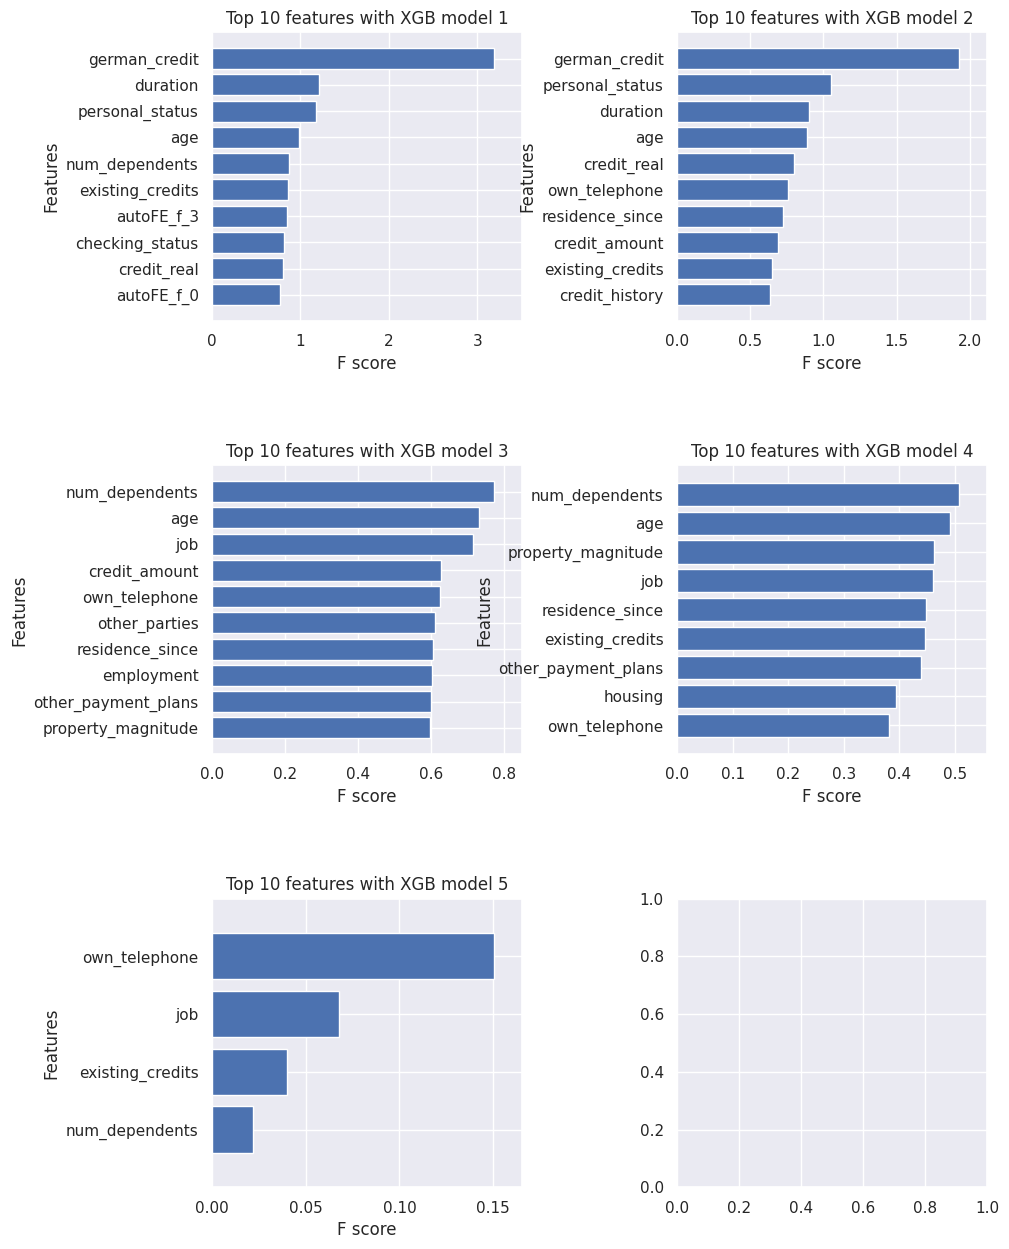

2023-10-08 14:51:53.830 | INFO     | quarkml.core.feature_selector:fwiz_selector:56 - === current_feature number: 24, selected feature number: 19 ===
2023-10-08 14:51:53.832 | INFO     | quarkml.feature_engineering:feature_selector:241 - *************** [feature_selector] cost time: 1.4499084949493408 ***************


    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 19 important features:
['german_credit', 'purpose', 'property_magnitude', 'autoFE_f_2', 'checking_status', 'duration', 'credit_history', 'credit_real', 'credit_amount', 'employment', 'other_parties', 'residence_since', 'installment_commitment', 'existing_credits', 'num_dependents', 'other_payment_plans', 'age', 'own_telephone', 'job']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 19 important features and a train dataframe
    Time taken to create entire pipeline = 1 second(s)


In [8]:
# 特征选择 fwiz
fwiz = FE.feature_selector(ds, 'class', cate_features=cat,  method='fwiz')

In [9]:
# 自动超参
best_params_hyperopt = ME.hparams(ds, 'class', cat_features=cat)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

2023-10-08 14:52:05.415 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1867, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 29, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 13.044559012575307, 'lambda_l2': 64.24700560329309, 'bagging_freq': 3, 'bagging_fraction': 0.9210776419077011, 'learning_rate': 0.07470399651383482, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 222} ************************************


Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.833746	valid_1's auc: 0.733003 
[200]	training's auc: 0.846919	valid_1's auc: 0.74128  
[300]	training's auc: 0.847117	valid_1's auc: 0.741566 
[400]	training's auc: 0.847117	valid_1's auc: 0.741566 
Early stopping, best iteration is:                     
[202]	training's auc: 0.847117	valid_1's auc: 0.741566
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

2023-10-08 14:52:05.507 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0962824821472168 ************************************


  1%|          | 1/100 [00:00<00:30,  3.26trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:05.636 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1609, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 17, 'max_depth': 5, 'min_data_in_leaf': 85, 'min_gain_to_split': 0, 'lambda_l1': 59.70652946598669, 'lambda_l2': 34.68031059437391, 'bagging_freq': 3, 'bagging_fraction': 0.5922636198277741, 'learning_rate': 0.05359180604091729, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 409} ************************************


Training until validation scores don't improve for 200 rounds                     
[100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[200]	training's auc: 0.5	valid_1's auc: 0.5                                      
Early stopping, best iteration is:                                                
[1]	training's auc: 0.5	valid_1's auc: 0.5
  1%|          | 1/100 [00:00<00:30,  3.26trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:05.689 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05746912956237793 ************************************


  2%|▏         | 2/100 [00:00<00:22,  4.26trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:05.910 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1731, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 56, 'max_depth': 4, 'min_data_in_leaf': 48, 'min_gain_to_split': 0, 'lambda_l1': 14.520440705147575, 'lambda_l2': 57.57928683315421, 'bagging_freq': 15, 'bagging_fraction': 0.6632897114640683, 'learning_rate': 0.15332676682644023, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 242} ************************************


[100]	training's auc: 0.779971	valid_1's auc: 0.71539                             
[200]	training's auc: 0.807022	valid_1's auc: 0.727247                            
[300]	training's auc: 0.8126	valid_1's auc: 0.73034                               
[400]	training's auc: 0.809057	valid_1's auc: 0.731084                            
[500]	training's auc: 0.816643	valid_1's auc: 0.735265                            
[600]	training's auc: 0.818778	valid_1's auc: 0.741451                            
[700]	training's auc: 0.818381	valid_1's auc: 0.738129                            
[800]	training's auc: 0.814999	valid_1's auc: 0.735323                            
[900]	training's auc: 0.816463	valid_1's auc: 0.737843                            
[1000]	training's auc: 0.818079	valid_1's auc: 0.737327                           
[1100]	training's auc: 0.823482	valid_1's auc: 0.738072                           
[1200]	training's auc: 0.82523	valid_1's auc: 0.736583                            
[130

2023-10-08 14:52:06.892 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.9864804744720459 ************************************


  3%|▎         | 3/100 [00:01<01:05,  1.48trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.027 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1022, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 41, 'max_depth': 3, 'min_data_in_leaf': 25, 'min_gain_to_split': 0, 'lambda_l1': 97.27490144196905, 'lambda_l2': 51.50237956535816, 'bagging_freq': 8, 'bagging_fraction': 0.884804183041044, 'learning_rate': 0.14750084567278993, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 339} ************************************


Training until validation scores don't improve for 200 rounds                     
[100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[200]	training's auc: 0.5	valid_1's auc: 0.5                                      
Early stopping, best iteration is:                                                
[1]	training's auc: 0.5	valid_1's auc: 0.5
  3%|▎         | 3/100 [00:01<01:05,  1.48trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.072 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.04978680610656738 ************************************


  4%|▍         | 4/100 [00:01<00:45,  2.09trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.296 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 299, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 54, 'max_depth': 6, 'min_data_in_leaf': 91, 'min_gain_to_split': 0, 'lambda_l1': 96.16933371469338, 'lambda_l2': 14.53523101515588, 'bagging_freq': 8, 'bagging_fraction': 0.9092261215413768, 'learning_rate': 0.18917284876481874, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 381} ************************************


Training until validation scores don't improve for 200 rounds                     
[100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[200]	training's auc: 0.5	valid_1's auc: 0.5                                      
Early stopping, best iteration is:                                                
[1]	training's auc: 0.5	valid_1's auc: 0.5
  4%|▍         | 4/100 [00:02<00:45,  2.09trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.349 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.058692216873168945 ************************************


  5%|▌         | 5/100 [00:02<00:38,  2.46trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.477 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1579, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 29, 'max_depth': 3, 'min_data_in_leaf': 10, 'min_gain_to_split': 0, 'lambda_l1': 29.81985151372776, 'lambda_l2': 97.58655668985709, 'bagging_freq': 15, 'bagging_fraction': 0.8607964717922529, 'learning_rate': 0.028407723127195236, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 175} ************************************


Training until validation scores don't improve for 200 rounds                     
[100]	training's auc: 0.764101	valid_1's auc: 0.707314                            
[200]	training's auc: 0.769184	valid_1's auc: 0.709577                            
Early stopping, best iteration is:                                                
[76]	training's auc: 0.75628	valid_1's auc: 0.713672
  5%|▌         | 5/100 [00:02<00:38,  2.46trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.534 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06154751777648926 ************************************


  6%|▌         | 6/100 [00:02<00:31,  3.01trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:07.751 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1882, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 31, 'max_depth': 5, 'min_data_in_leaf': 77, 'min_gain_to_split': 0, 'lambda_l1': 77.66612872587412, 'lambda_l2': 59.19463981167512, 'bagging_freq': 5, 'bagging_fraction': 0.9942995287220652, 'learning_rate': 0.0463696696024343, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 449} ************************************


[100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[200]	training's auc: 0.5	valid_1's auc: 0.5                                      
[300]	training's auc: 0.5	valid_1's auc: 0.5                                      
[400]	training's auc: 0.5	valid_1's auc: 0.5                                      
[500]	training's auc: 0.5	valid_1's auc: 0.5                                      
[600]	training's auc: 0.5	valid_1's auc: 0.5                                      
[700]	training's auc: 0.5	valid_1's auc: 0.5                                      
[800]	training's auc: 0.5	valid_1's auc: 0.5                                      
[900]	training's auc: 0.5	valid_1's auc: 0.5                                      
[1000]	training's auc: 0.5	valid_1's auc: 0.5                                     
[1100]	training's auc: 0.5	valid_1's auc: 0.5                                     
[1200]	training's auc: 0.5	valid_1's auc: 0.5                                     
[130

2023-10-08 14:52:07.936 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.18946290016174316 ************************************


  7%|▋         | 7/100 [00:02<00:32,  2.83trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.068 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1681, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 63, 'max_depth': 7, 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'lambda_l1': 57.08642693875091, 'lambda_l2': 88.87090289078111, 'bagging_freq': 9, 'bagging_fraction': 0.5382404628873974, 'learning_rate': 0.17372787409161894, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 390} ************************************


Training until validation scores don't improve for 200 rounds                     
[100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[200]	training's auc: 0.5	valid_1's auc: 0.5                                      
Early stopping, best iteration is:                                                
[1]	training's auc: 0.5	valid_1's auc: 0.5
  7%|▋         | 7/100 [00:02<00:32,  2.83trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.117 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05697345733642578 ************************************


  8%|▊         | 8/100 [00:02<00:27,  3.34trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.336 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 744, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 25, 'max_depth': 6, 'min_data_in_leaf': 66, 'min_gain_to_split': 0, 'lambda_l1': 25.244407301207104, 'lambda_l2': 84.39252014944266, 'bagging_freq': 16, 'bagging_fraction': 0.6013998860710592, 'learning_rate': 0.1737426148466858, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 294} ************************************


[100]	training's auc: 0.716618	valid_1's auc: 0.707887                            
[200]	training's auc: 0.768565	valid_1's auc: 0.723524                            
[300]	training's auc: 0.77326	valid_1's auc: 0.729509                             
[400]	training's auc: 0.769528	valid_1's auc: 0.72885                             
[500]	training's auc: 0.769363	valid_1's auc: 0.725328                            
[600]	training's auc: 0.766378	valid_1's auc: 0.725958                            
[700]	training's auc: 0.770213	valid_1's auc: 0.724583                            
  8%|▊         | 8/100 [00:03<00:27,  3.34trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.543 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.2120652198791504 ************************************


  9%|▉         | 9/100 [00:03<00:30,  2.95trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.676 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1048, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 29, 'max_depth': 7, 'min_data_in_leaf': 93, 'min_gain_to_split': 0, 'lambda_l1': 78.62995383142439, 'lambda_l2': 24.067435955804083, 'bagging_freq': 12, 'bagging_fraction': 0.9998815028083228, 'learning_rate': 0.09752028465262509, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 437} ************************************


Training until validation scores don't improve for 200 rounds                     
[100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[200]	training's auc: 0.5	valid_1's auc: 0.5                                      
Early stopping, best iteration is:                                                
[1]	training's auc: 0.5	valid_1's auc: 0.5
  9%|▉         | 9/100 [00:03<00:30,  2.95trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.725 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.056851863861083984 ************************************


 10%|█         | 10/100 [00:03<00:26,  3.45trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:08.945 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1866, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 29, 'max_depth': 5, 'min_data_in_leaf': 93, 'min_gain_to_split': 0, 'lambda_l1': 14.876907717030841, 'lambda_l2': 14.57927073933546, 'bagging_freq': 2, 'bagging_fraction': 0.9511501712899317, 'learning_rate': 0.03697045288432945, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 389} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.81848	valid_1's auc: 0.714188                              
[200]	training's auc: 0.834497	valid_1's auc: 0.727963                             
[300]	training's auc: 0.838493	valid_1's auc: 0.731886                             
[400]	training's auc: 0.839947	valid_1's auc: 0.733604                             
[500]	training's auc: 0.841572	valid_1's auc: 0.735437                             
[600]	training's auc: 0.842186	valid_1's auc: 0.735724                             
[700]	training's auc: 0.842186	valid_1's auc: 0.735724                             
Early stopping, best iteration is:                                                 
[532]	training's auc: 0.84179	valid_1's auc: 0.735724
 10%|█         | 10/100 [00:03<00:26,  3.45trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.094 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.1529254913330078 ************************************


 11%|█         | 11/100 [00:03<00:27,  3.18trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.222 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 383, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 39, 'max_depth': 5, 'min_data_in_leaf': 49, 'min_gain_to_split': 0, 'lambda_l1': 32.194419828846, 'lambda_l2': 28.681685060620133, 'bagging_freq': 18, 'bagging_fraction': 0.9145708919586424, 'learning_rate': 0.036832897206433735, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 434} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.709302	valid_1's auc: 0.693596                             
[200]	training's auc: 0.734411	valid_1's auc: 0.695343                             
[300]	training's auc: 0.734411	valid_1's auc: 0.695343                             
Early stopping, best iteration is:                                                 
[181]	training's auc: 0.734411	valid_1's auc: 0.695343
 11%|█         | 11/100 [00:04<00:27,  3.18trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.300 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08197402954101562 ************************************


 12%|█▏        | 12/100 [00:04<00:24,  3.55trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.519 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 658, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 49, 'max_depth': 6, 'min_data_in_leaf': 42, 'min_gain_to_split': 0, 'lambda_l1': 91.5401719191397, 'lambda_l2': 33.796409428515894, 'bagging_freq': 17, 'bagging_fraction': 0.9560891493996871, 'learning_rate': 0.11500165250422457, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 371} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 12%|█▏        | 12/100 [00:04<00:24,  3.55trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.567 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.052445173263549805 ************************************


 13%|█▎        | 13/100 [00:04<00:24,  3.61trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.695 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 426, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 39, 'max_depth': 7, 'min_data_in_leaf': 86, 'min_gain_to_split': 0, 'lambda_l1': 1.351232830772675, 'lambda_l2': 55.42812734372995, 'bagging_freq': 5, 'bagging_fraction': 0.9460661471647038, 'learning_rate': 0.12589701213621723, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 469} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.926525	valid_1's auc: 0.758635                             
[200]	training's auc: 0.964925	valid_1's auc: 0.744086                             
[300]	training's auc: 0.982892	valid_1's auc: 0.742196                             
Early stopping, best iteration is:                                                 
[104]	training's auc: 0.928509	valid_1's auc: 0.760754
 13%|█▎        | 13/100 [00:04<00:24,  3.61trial/s, best loss: -0.7415659545220231]

2023-10-08 14:52:09.795 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.10390663146972656 ************************************


 14%|█▍        | 14/100 [00:04<00:22,  3.81trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:10.017 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 515, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 62, 'max_depth': 3, 'min_data_in_leaf': 54, 'min_gain_to_split': 0, 'lambda_l1': 32.88231485890207, 'lambda_l2': 74.80089870618846, 'bagging_freq': 17, 'bagging_fraction': 0.9805956628631736, 'learning_rate': 0.07580986299311192, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 487} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.744741	valid_1's auc: 0.6889                               
[200]	training's auc: 0.744741	valid_1's auc: 0.6889                               
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.719726	valid_1's auc: 0.689043
 14%|█▍        | 14/100 [00:04<00:22,  3.81trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:10.071 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05804872512817383 ************************************


 15%|█▌        | 15/100 [00:04<00:22,  3.76trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:10.199 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 997, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 53, 'max_depth': 6, 'min_data_in_leaf': 29, 'min_gain_to_split': 0, 'lambda_l1': 26.677035244440784, 'lambda_l2': 78.00520461556718, 'bagging_freq': 11, 'bagging_fraction': 0.8663832966863965, 'learning_rate': 0.04556596347479821, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 415} ************************************


[100]	training's auc: 0.771309	valid_1's auc: 0.725099                             
[200]	training's auc: 0.790075	valid_1's auc: 0.726273                             
[300]	training's auc: 0.792413	valid_1's auc: 0.727762                             
[400]	training's auc: 0.793603	valid_1's auc: 0.725414                             
[500]	training's auc: 0.797022	valid_1's auc: 0.727132                             
[600]	training's auc: 0.795917	valid_1's auc: 0.728793                             
[700]	training's auc: 0.796134	valid_1's auc: 0.728507                             
[800]	training's auc: 0.794425	valid_1's auc: 0.72971                              
[900]	training's auc: 0.792611	valid_1's auc: 0.727533                             
 15%|█▌        | 15/100 [00:05<00:22,  3.76trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:10.718 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.5234804153442383 ************************************


 16%|█▌        | 16/100 [00:05<00:32,  2.62trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:10.938 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1849, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 38, 'max_depth': 6, 'min_data_in_leaf': 84, 'min_gain_to_split': 0, 'lambda_l1': 81.35310582121477, 'lambda_l2': 83.77735895650638, 'bagging_freq': 1, 'bagging_fraction': 0.6921557498901756, 'learning_rate': 0.1858251867900939, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 285} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 16%|█▌        | 16/100 [00:05<00:32,  2.62trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:10.984 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.051186323165893555 ************************************


 17%|█▋        | 17/100 [00:05<00:28,  2.88trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:11.112 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 486, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 29, 'max_depth': 4, 'min_data_in_leaf': 42, 'min_gain_to_split': 0, 'lambda_l1': 97.7065322878978, 'lambda_l2': 70.2720608346677, 'bagging_freq': 12, 'bagging_fraction': 0.6440032354923171, 'learning_rate': 0.12065172848775708, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 447} ************************************


[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
[300]	training's auc: 0.5	valid_1's auc: 0.5                                       
[400]	training's auc: 0.5	valid_1's auc: 0.5                                       
 17%|█▋        | 17/100 [00:05<00:28,  2.88trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:11.187 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07974743843078613 ************************************


 18%|█▊        | 18/100 [00:05<00:24,  3.30trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:11.404 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1761, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 46, 'max_depth': 5, 'min_data_in_leaf': 66, 'min_gain_to_split': 0, 'lambda_l1': 35.097441445584984, 'lambda_l2': 45.73546919122256, 'bagging_freq': 19, 'bagging_fraction': 0.8901026061240465, 'learning_rate': 0.17256566251659902, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 387} ************************************


[100]	training's auc: 0.780373	valid_1's auc: 0.734149                             
[200]	training's auc: 0.794368	valid_1's auc: 0.731772                             
[300]	training's auc: 0.790126	valid_1's auc: 0.725815                             
[400]	training's auc: 0.789503	valid_1's auc: 0.725414                             
[500]	training's auc: 0.790046	valid_1's auc: 0.727132                             
[600]	training's auc: 0.788105	valid_1's auc: 0.727762                             
[700]	training's auc: 0.785937	valid_1's auc: 0.72298                              
[800]	training's auc: 0.78545	valid_1's auc: 0.723839                              
[900]	training's auc: 0.789966	valid_1's auc: 0.723781                             
[1000]	training's auc: 0.788861	valid_1's auc: 0.723896                            
[1100]	training's auc: 0.784345	valid_1's auc: 0.723953                            
[1200]	training's auc: 0.792677	valid_1's auc: 0.72361                      

2023-10-08 14:52:12.056 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.6567625999450684 ************************************


 19%|█▉        | 19/100 [00:06<00:38,  2.11trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:12.186 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 497, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 44, 'max_depth': 6, 'min_data_in_leaf': 96, 'min_gain_to_split': 0, 'lambda_l1': 47.83599973246212, 'lambda_l2': 84.3608503670998, 'bagging_freq': 13, 'bagging_fraction': 0.9423900082772176, 'learning_rate': 0.08566647167947838, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 230} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 19%|█▉        | 19/100 [00:07<00:38,  2.11trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:12.237 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05583524703979492 ************************************


 20%|██        | 20/100 [00:07<00:30,  2.60trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:12.464 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 590, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 16, 'max_depth': 7, 'min_data_in_leaf': 86, 'min_gain_to_split': 0, 'lambda_l1': 3.9144853152167505, 'lambda_l2': 66.6995509563535, 'bagging_freq': 7, 'bagging_fraction': 0.7855539047375866, 'learning_rate': 0.0018579218827157462, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 215} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.760516	valid_1's auc: 0.717452                             
[200]	training's auc: 0.774833	valid_1's auc: 0.72066                              
Early stopping, best iteration is:                                                 
[14]	training's auc: 0.723991	valid_1's auc: 0.731514
 20%|██        | 20/100 [00:07<00:30,  2.60trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:12.526 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0692284107208252 ************************************


 21%|██        | 21/100 [00:07<00:28,  2.81trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:12.753 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.915992	valid_1's auc: 0.756229                             
[200]	training's auc: 0.952909	valid_1's auc: 0.755484                             
Early stopping, best iteration is:                                                 
[62]	training's auc: 0.885168	valid_1's auc: 0.76505
 21%|██        | 21/100 [00:07<00:28,  2.81trial/s, best loss: -0.7607537659659774]

2023-10-08 14:52:12.837 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09077191352844238 ************************************


 22%|██▏       | 22/100 [00:07<00:26,  2.92trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:12.971 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1390, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 75, 'min_gain_to_split': 0, 'lambda_l1': 1.0483938443526744, 'lambda_l2': 43.64425242990121, 'bagging_freq': 5, 'bagging_fraction': 0.7799359542339971, 'learning_rate': 0.13410523139505376, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 143} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.907263	valid_1's auc: 0.754568                             
[200]	training's auc: 0.94573	valid_1's auc: 0.74254                               
Early stopping, best iteration is:                                                 
[82]	training's auc: 0.899914	valid_1's auc: 0.76041
 22%|██▏       | 22/100 [00:07<00:26,  2.92trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.057 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09066295623779297 ************************************


 23%|██▎       | 23/100 [00:07<00:23,  3.27trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.194 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1446, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 10, 'max_depth': 7, 'min_data_in_leaf': 7, 'min_gain_to_split': 0, 'lambda_l1': 6.245786415614036, 'lambda_l2': 6.407916785165639, 'bagging_freq': 14, 'bagging_fraction': 0.812997436261129, 'learning_rate': 0.11196913486032721, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 353} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.906952	valid_1's auc: 0.752678                             
[200]	training's auc: 0.917636	valid_1's auc: 0.747695                             
Early stopping, best iteration is:                                                 
[80]	training's auc: 0.903985	valid_1's auc: 0.757718
 23%|██▎       | 23/100 [00:08<00:23,  3.27trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.270 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08156871795654297 ************************************


 24%|██▍       | 24/100 [00:08<00:21,  3.60trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.499 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1008, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 19, 'max_depth': 4, 'min_data_in_leaf': 89, 'min_gain_to_split': 0, 'lambda_l1': 43.26126129548925, 'lambda_l2': 39.45152749783355, 'bagging_freq': 6, 'bagging_fraction': 0.7227020401086599, 'learning_rate': 0.1361549297405406, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 178} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.690735	valid_1's auc: 0.686007                             
[200]	training's auc: 0.690735	valid_1's auc: 0.686007                             
Early stopping, best iteration is:                                                 
[2]	training's auc: 0.68229	valid_1's auc: 0.686064
 24%|██▍       | 24/100 [00:08<00:21,  3.60trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.549 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.057224273681640625 ************************************


 25%|██▌       | 25/100 [00:08<00:20,  3.60trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.772 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1956, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 47, 'max_depth': 7, 'min_data_in_leaf': 86, 'min_gain_to_split': 0, 'lambda_l1': 21.309318971498577, 'lambda_l2': 52.28345796570073, 'bagging_freq': 10, 'bagging_fraction': 0.8298625757272088, 'learning_rate': 0.15198000483097482, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 158} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.78178	valid_1's auc: 0.708345                              
[200]	training's auc: 0.789328	valid_1's auc: 0.714216                             
[300]	training's auc: 0.789328	valid_1's auc: 0.714216                             
Early stopping, best iteration is:                                                 
[160]	training's auc: 0.789328	valid_1's auc: 0.714216
 25%|██▌       | 25/100 [00:08<00:20,  3.60trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.843 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07579565048217773 ************************************


 26%|██▌       | 26/100 [00:08<00:20,  3.54trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:13.976 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 39, 'max_depth': 4, 'min_data_in_leaf': 23, 'min_gain_to_split': 0, 'lambda_l1': 8.761751770171074, 'lambda_l2': 18.049367922324198, 'bagging_freq': 3, 'bagging_fraction': 0.7526365020429532, 'learning_rate': 0.13003596311136478, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 368} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.871045	valid_1's auc: 0.746377                             
[200]	training's auc: 0.881267	valid_1's auc: 0.749585                             
[300]	training's auc: 0.881267	valid_1's auc: 0.749585                             
Early stopping, best iteration is:                                                 
[142]	training's auc: 0.878348	valid_1's auc: 0.752219
 26%|██▌       | 26/100 [00:08<00:20,  3.54trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.065 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09404754638671875 ************************************


 27%|██▋       | 27/100 [00:08<00:19,  3.77trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.317 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 426, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 36, 'max_depth': 7, 'min_data_in_leaf': 79, 'min_gain_to_split': 0, 'lambda_l1': 0.7057446392610075, 'lambda_l2': 58.337695799467554, 'bagging_freq': 4, 'bagging_fraction': 0.8348785827663683, 'learning_rate': 0.09248374656938527, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 57} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.895332	valid_1's auc: 0.756916                             
[200]	training's auc: 0.935008	valid_1's auc: 0.744315                             
Early stopping, best iteration is:                                                 
[92]	training's auc: 0.887945	valid_1's auc: 0.757604
 27%|██▋       | 27/100 [00:09<00:19,  3.77trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.406 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09408736228942871 ************************************


 28%|██▊       | 28/100 [00:09<00:20,  3.47trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.545 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1357, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 60, 'max_depth': 4, 'min_data_in_leaf': 14, 'min_gain_to_split': 0, 'lambda_l1': 18.13463500152602, 'lambda_l2': 64.6278502295732, 'bagging_freq': 3, 'bagging_fraction': 0.732595511382629, 'learning_rate': 0.0678689212791808, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 159} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.793456	valid_1's auc: 0.725213                             
[200]	training's auc: 0.803961	valid_1's auc: 0.731485                             
Early stopping, best iteration is:                                                 
[7]	training's auc: 0.738709	valid_1's auc: 0.736927
 28%|██▊       | 28/100 [00:09<00:20,  3.47trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.611 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07375288009643555 ************************************


 29%|██▉       | 29/100 [00:09<00:18,  3.79trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.842 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 779, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 11, 'max_depth': 7, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 67.11249373852348, 'lambda_l2': 1.4668972009014496, 'bagging_freq': 5, 'bagging_fraction': 0.7927914312309357, 'learning_rate': 0.10377231003338987, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 149} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 29%|██▉       | 29/100 [00:09<00:18,  3.79trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:14.892 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05704021453857422 ************************************


 30%|███       | 30/100 [00:09<00:18,  3.74trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.024 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1111, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 48, 'max_depth': 4, 'min_data_in_leaf': 39, 'min_gain_to_split': 0, 'lambda_l1': 9.054210892017142, 'lambda_l2': 37.4709120737952, 'bagging_freq': 3, 'bagging_fraction': 0.8506264066209126, 'learning_rate': 0.15752252622183252, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 150} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.878489	valid_1's auc: 0.755771                             
[200]	training's auc: 0.890146	valid_1's auc: 0.752334                             
[300]	training's auc: 0.891176	valid_1's auc: 0.751532                             
Early stopping, best iteration is:                                                 
[110]	training's auc: 0.879859	valid_1's auc: 0.757489
 30%|███       | 30/100 [00:09<00:18,  3.74trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.104 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08493852615356445 ************************************


 31%|███       | 31/100 [00:09<00:17,  3.96trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.337 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 476, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 14, 'max_depth': 4, 'min_data_in_leaf': 53, 'min_gain_to_split': 0, 'lambda_l1': 38.48252482348728, 'lambda_l2': 45.652029708299054, 'bagging_freq': 9, 'bagging_fraction': 0.7066605458936609, 'learning_rate': 0.07822007246258253, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 469} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.690735	valid_1's auc: 0.686007                             
[200]	training's auc: 0.690735	valid_1's auc: 0.686007                             
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 31%|███       | 31/100 [00:10<00:17,  3.96trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.388 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05637812614440918 ************************************


 32%|███▏      | 32/100 [00:10<00:17,  3.84trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.526 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1151, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 15, 'max_depth': 3, 'min_data_in_leaf': 68, 'min_gain_to_split': 0, 'lambda_l1': 54.48648210635231, 'lambda_l2': 26.387018637392206, 'bagging_freq': 7, 'bagging_fraction': 0.6600505683618688, 'learning_rate': 0.19923739599300685, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 412} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 32%|███▏      | 32/100 [00:10<00:17,  3.84trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.578 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.056646108627319336 ************************************


 33%|███▎      | 33/100 [00:10<00:16,  4.17trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.813 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 766, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 12, 'max_depth': 7, 'min_data_in_leaf': 88, 'min_gain_to_split': 0, 'lambda_l1': 66.52025114003109, 'lambda_l2': 55.07863827013912, 'bagging_freq': 4, 'bagging_fraction': 0.7524868324513856, 'learning_rate': 0.05925128383881101, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 233} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 33%|███▎      | 33/100 [00:10<00:16,  4.17trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:15.864 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0585477352142334 ************************************


 34%|███▍      | 34/100 [00:10<00:16,  3.95trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:16.011 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 824, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 23, 'max_depth': 4, 'min_data_in_leaf': 28, 'min_gain_to_split': 0, 'lambda_l1': 12.36768748219858, 'lambda_l2': 61.08700671945771, 'bagging_freq': 6, 'bagging_fraction': 0.5091093441051823, 'learning_rate': 0.1622025675542557, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 235} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.798123	valid_1's auc: 0.727447                             
[200]	training's auc: 0.817578	valid_1's auc: 0.740077                             
[300]	training's auc: 0.82181	valid_1's auc: 0.741795                              
[400]	training's auc: 0.825976	valid_1's auc: 0.746148                             
[500]	training's auc: 0.829726	valid_1's auc: 0.746377                             
[600]	training's auc: 0.834034	valid_1's auc: 0.749298                             
[700]	training's auc: 0.837047	valid_1's auc: 0.750845                             
[800]	training's auc: 0.839834	valid_1's auc: 0.752735                             
Did not meet early stopping. Best iteration is:                                    
[810]	training's auc: 0.840476	valid_1's auc: 0.755083
 34%|███▍      | 34/100 [00:10<00:16,  3.95trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:16.193 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.18719053268432617 ************************************


 35%|███▌      | 35/100 [00:10<00:17,  3.62trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:16.333 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1604, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 55, 'max_depth': 3, 'min_data_in_leaf': 17, 'min_gain_to_split': 0, 'lambda_l1': 21.066102436698117, 'lambda_l2': 51.29901549094078, 'bagging_freq': 5, 'bagging_fraction': 0.888550958429568, 'learning_rate': 0.1435626704471985, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 341} ************************************


[100]	training's auc: 0.818839	valid_1's auc: 0.72255                              
[200]	training's auc: 0.830539	valid_1's auc: 0.729194                             
[300]	training's auc: 0.831927	valid_1's auc: 0.73223                              
[400]	training's auc: 0.833713	valid_1's auc: 0.735437                             
[500]	training's auc: 0.836792	valid_1's auc: 0.731485                             
[600]	training's auc: 0.836329	valid_1's auc: 0.732173                             
[700]	training's auc: 0.834912	valid_1's auc: 0.735552                             
[800]	training's auc: 0.83786	valid_1's auc: 0.735036                              
[900]	training's auc: 0.836358	valid_1's auc: 0.733604                             
[1000]	training's auc: 0.833505	valid_1's auc: 0.733146                            
[1100]	training's auc: 0.835441	valid_1's auc: 0.734177                            
[1200]	training's auc: 0.83325	valid_1's auc: 0.737156                      

2023-10-08 14:52:17.358 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 1.0324034690856934 ************************************


 36%|███▌      | 36/100 [00:12<00:34,  1.84trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:17.586 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 793, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 51, 'max_depth': 7, 'min_data_in_leaf': 58, 'min_gain_to_split': 0, 'lambda_l1': 43.163243004232505, 'lambda_l2': 97.93942378328327, 'bagging_freq': 15, 'bagging_fraction': 0.934051553294026, 'learning_rate': 0.12172926839637165, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 282} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 36%|███▌      | 36/100 [00:12<00:34,  1.84trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:17.637 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05556488037109375 ************************************


 37%|███▋      | 37/100 [00:12<00:29,  2.16trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:17.867 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 401, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 52, 'max_depth': 4, 'min_data_in_leaf': 57, 'min_gain_to_split': 0, 'lambda_l1': 0.2836725908631894, 'lambda_l2': 33.80420606045696, 'bagging_freq': 8, 'bagging_fraction': 0.9726903403917653, 'learning_rate': 0.01587077965026691, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 174} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.833245	valid_1's auc: 0.729309                             
[200]	training's auc: 0.878461	valid_1's auc: 0.75411                              
[300]	training's auc: 0.898431	valid_1's auc: 0.753193                             
[400]	training's auc: 0.916049	valid_1's auc: 0.753881                             
Did not meet early stopping. Best iteration is:                                    
[351]	training's auc: 0.908567	valid_1's auc: 0.755771
 37%|███▋      | 37/100 [00:12<00:29,  2.16trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:17.993 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.1329338550567627 ************************************


 38%|███▊      | 38/100 [00:12<00:26,  2.32trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:18.128 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1848, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 5, 'min_data_in_leaf': 11, 'min_gain_to_split': 0, 'lambda_l1': 64.04609716678715, 'lambda_l2': 92.33488943972257, 'bagging_freq': 16, 'bagging_fraction': 0.6109397804056587, 'learning_rate': 0.10964783206536115, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 435} ************************************


[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
[300]	training's auc: 0.5	valid_1's auc: 0.5                                       
[400]	training's auc: 0.5	valid_1's auc: 0.5                                       
[500]	training's auc: 0.5	valid_1's auc: 0.5                                       
[600]	training's auc: 0.5	valid_1's auc: 0.5                                       
[700]	training's auc: 0.5	valid_1's auc: 0.5                                       
[800]	training's auc: 0.5	valid_1's auc: 0.5                                       
[900]	training's auc: 0.5	valid_1's auc: 0.5                                       
[1000]	training's auc: 0.5	valid_1's auc: 0.5                                      
[1100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[1200]	training's auc: 0.5	valid_1's auc: 0.5                               

2023-10-08 14:52:18.356 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.23243355751037598 ************************************


 39%|███▉      | 39/100 [00:13<00:25,  2.43trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:18.586 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1307, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 45, 'max_depth': 7, 'min_data_in_leaf': 38, 'min_gain_to_split': 0, 'lambda_l1': 14.669674430756935, 'lambda_l2': 70.1161385613224, 'bagging_freq': 2, 'bagging_fraction': 0.9137633546317596, 'learning_rate': 0.14356257410149334, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 116} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.844231	valid_1's auc: 0.746778                             
[200]	training's auc: 0.847302	valid_1's auc: 0.749871                             
[300]	training's auc: 0.847302	valid_1's auc: 0.749871                             
Early stopping, best iteration is:                                                 
[137]	training's auc: 0.847302	valid_1's auc: 0.749871
 39%|███▉      | 39/100 [00:13<00:25,  2.43trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:18.659 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07964444160461426 ************************************


 40%|████      | 40/100 [00:13<00:22,  2.64trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:18.796 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1316, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 21, 'max_depth': 3, 'min_data_in_leaf': 41, 'min_gain_to_split': 0, 'lambda_l1': 25.359967111878213, 'lambda_l2': 41.7591619563424, 'bagging_freq': 18, 'bagging_fraction': 0.8106727925700956, 'learning_rate': 0.12625966088304144, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 186} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.732928	valid_1's auc: 0.70445                              
[200]	training's auc: 0.737689	valid_1's auc: 0.710407                             
Early stopping, best iteration is:                                                 
[55]	training's auc: 0.729244	valid_1's auc: 0.710465
 40%|████      | 40/100 [00:13<00:22,  2.64trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:18.853 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06457972526550293 ************************************


 41%|████      | 41/100 [00:13<00:19,  3.09trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.085 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1820, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 50, 'max_depth': 4, 'min_data_in_leaf': 34, 'min_gain_to_split': 0, 'lambda_l1': 5.924146935113886, 'lambda_l2': 47.74815674947806, 'bagging_freq': 14, 'bagging_fraction': 0.5477604350015344, 'learning_rate': 0.1866149207986721, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.852984	valid_1's auc: 0.746034                             
[200]	training's auc: 0.875958	valid_1's auc: 0.747809                             
[300]	training's auc: 0.882693	valid_1's auc: 0.748897                             
[400]	training's auc: 0.900972	valid_1's auc: 0.751647                             
[500]	training's auc: 0.905846	valid_1's auc: 0.73853                              
Early stopping, best iteration is:                                                 
[391]	training's auc: 0.898667	valid_1's auc: 0.757374
 41%|████      | 41/100 [00:13<00:19,  3.09trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.224 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.1466989517211914 ************************************


 42%|████▏     | 42/100 [00:14<00:19,  2.97trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.363 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 527, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 37, 'max_depth': 5, 'min_data_in_leaf': 99, 'min_gain_to_split': 0, 'lambda_l1': 72.10026067512325, 'lambda_l2': 20.630920874342998, 'bagging_freq': 19, 'bagging_fraction': 0.8713375733271592, 'learning_rate': 0.16360112076555927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 362} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 42%|████▏     | 42/100 [00:14<00:19,  2.97trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.418 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06001996994018555 ************************************


 43%|████▎     | 43/100 [00:14<00:16,  3.39trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.650 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 800, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 18, 'max_depth': 7, 'min_data_in_leaf': 90, 'min_gain_to_split': 0, 'lambda_l1': 89.87006642833299, 'lambda_l2': 30.18614081808628, 'bagging_freq': 11, 'bagging_fraction': 0.9670590253560865, 'learning_rate': 0.19770481514195354, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 315} ************************************


[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
[300]	training's auc: 0.5	valid_1's auc: 0.5                                       
[400]	training's auc: 0.5	valid_1's auc: 0.5                                       
[500]	training's auc: 0.5	valid_1's auc: 0.5                                       
[600]	training's auc: 0.5	valid_1's auc: 0.5                                       
[700]	training's auc: 0.5	valid_1's auc: 0.5                                       
[800]	training's auc: 0.5	valid_1's auc: 0.5                                       
 43%|████▎     | 43/100 [00:14<00:16,  3.39trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.762 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.11950063705444336 ************************************


 44%|████▍     | 44/100 [00:14<00:17,  3.24trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.899 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1701, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 59, 'max_depth': 3, 'min_data_in_leaf': 70, 'min_gain_to_split': 0, 'lambda_l1': 18.742261471352695, 'lambda_l2': 76.33699826078154, 'bagging_freq': 1, 'bagging_fraction': 0.9957361615666471, 'learning_rate': 0.08875986644547809, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 142} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.756969	valid_1's auc: 0.699868                             
[200]	training's auc: 0.756969	valid_1's auc: 0.699868                             
Early stopping, best iteration is:                                                 
[3]	training's auc: 0.75849	valid_1's auc: 0.709634
 44%|████▍     | 44/100 [00:14<00:17,  3.24trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:19.955 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06394457817077637 ************************************


 45%|████▌     | 45/100 [00:14<00:15,  3.64trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.182 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1313, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 26, 'max_depth': 6, 'min_data_in_leaf': 72, 'min_gain_to_split': 0, 'lambda_l1': 52.090974350811905, 'lambda_l2': 10.512020898145039, 'bagging_freq': 13, 'bagging_fraction': 0.9041697085882578, 'learning_rate': 0.10131686080199831, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 126} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 45%|████▌     | 45/100 [00:15<00:15,  3.64trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.232 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.056856632232666016 ************************************


 46%|████▌     | 46/100 [00:15<00:14,  3.64trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.366 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 488, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 24, 'max_depth': 7, 'min_data_in_leaf': 67, 'min_gain_to_split': 0, 'lambda_l1': 11.332957213620944, 'lambda_l2': 62.20056886420991, 'bagging_freq': 10, 'bagging_fraction': 0.6823699899163644, 'learning_rate': 0.17861243738468946, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 190} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.748151	valid_1's auc: 0.708718                             
[200]	training's auc: 0.751892	valid_1's auc: 0.711324                             
Early stopping, best iteration is:                                                 
[65]	training's auc: 0.747112	valid_1's auc: 0.716221
 46%|████▌     | 46/100 [00:15<00:14,  3.64trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.436 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07428288459777832 ************************************


 47%|████▋     | 47/100 [00:15<00:13,  3.94trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.664 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 289, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 57, 'max_depth': 5, 'min_data_in_leaf': 36, 'min_gain_to_split': 0, 'lambda_l1': 60.10001500935379, 'lambda_l2': 55.302934383405514, 'bagging_freq': 3, 'bagging_fraction': 0.7708516620845153, 'learning_rate': 0.06188549811731141, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 455} ************************************


[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
 47%|████▋     | 47/100 [00:15<00:13,  3.94trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.713 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0567021369934082 ************************************


 48%|████▊     | 48/100 [00:15<00:13,  3.84trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.846 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1915, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 61, 'max_depth': 4, 'min_data_in_leaf': 63, 'min_gain_to_split': 0, 'lambda_l1': 29.091869711258596, 'lambda_l2': 80.2999764164645, 'bagging_freq': 5, 'bagging_fraction': 0.9312912735424407, 'learning_rate': 0.13877893724983342, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 380} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.77497	valid_1's auc: 0.702446                              
[200]	training's auc: 0.774729	valid_1's auc: 0.701873                             
Early stopping, best iteration is:                                                 
[37]	training's auc: 0.77659	valid_1's auc: 0.704021
 48%|████▊     | 48/100 [00:15<00:13,  3.84trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:20.905 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06356644630432129 ************************************


 49%|████▉     | 49/100 [00:15<00:12,  4.16trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:21.133 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 577, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 22, 'max_depth': 6, 'min_data_in_leaf': 98, 'min_gain_to_split': 0, 'lambda_l1': 38.19308413242532, 'lambda_l2': 69.84297134909363, 'bagging_freq': 9, 'bagging_fraction': 0.8389188286651288, 'learning_rate': 0.1487617729525684, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 130} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.690735	valid_1's auc: 0.686007                             
[200]	training's auc: 0.738511	valid_1's auc: 0.691162                             
[300]	training's auc: 0.746233	valid_1's auc: 0.692938                             
[400]	training's auc: 0.746233	valid_1's auc: 0.692938                             
Early stopping, best iteration is:                                                 
[234]	training's auc: 0.746233	valid_1's auc: 0.692938
 49%|████▉     | 49/100 [00:15<00:12,  4.16trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:21.211 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08523869514465332 ************************************


 50%|█████     | 50/100 [00:16<00:12,  3.85trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:21.345 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 444, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 34, 'max_depth': 7, 'min_data_in_leaf': 59, 'min_gain_to_split': 0, 'lambda_l1': 87.38270228089709, 'lambda_l2': 93.28353048335794, 'bagging_freq': 17, 'bagging_fraction': 0.6214519348401858, 'learning_rate': 0.11953562950063665, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 167} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 50%|█████     | 50/100 [00:16<00:12,  3.85trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:21.391 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05028057098388672 ************************************


 51%|█████     | 51/100 [00:16<00:11,  4.24trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:21.617 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1392, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 33, 'max_depth': 4, 'min_data_in_leaf': 31, 'min_gain_to_split': 0, 'lambda_l1': 3.4155972899472142, 'lambda_l2': 31.00139155574177, 'bagging_freq': 12, 'bagging_fraction': 0.8092841163277149, 'learning_rate': 0.08301727124409602, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 247} ************************************


[100]	training's auc: 0.837916	valid_1's auc: 0.729194                             
[200]	training's auc: 0.878867	valid_1's auc: 0.744544                             
[300]	training's auc: 0.890949	valid_1's auc: 0.750215                             
[400]	training's auc: 0.914122	valid_1's auc: 0.751131                             
[500]	training's auc: 0.923946	valid_1's auc: 0.753709                             
[600]	training's auc: 0.934016	valid_1's auc: 0.752792                             
[700]	training's auc: 0.941696	valid_1's auc: 0.756859                             
[800]	training's auc: 0.951105	valid_1's auc: 0.755141                             
[900]	training's auc: 0.955233	valid_1's auc: 0.755771                             
[1000]	training's auc: 0.959918	valid_1's auc: 0.75073                             
[1100]	training's auc: 0.962138	valid_1's auc: 0.749012                            
[1200]	training's auc: 0.963442	valid_1's auc: 0.74695                      

2023-10-08 14:52:23.014 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 1.4033033847808838 ************************************


 52%|█████▏    | 52/100 [00:17<00:31,  1.53trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.154 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 399, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 8, 'max_depth': 3, 'min_data_in_leaf': 20, 'min_gain_to_split': 0, 'lambda_l1': 17.118728901760466, 'lambda_l2': 37.3983469931009, 'bagging_freq': 15, 'bagging_fraction': 0.8692550464381219, 'learning_rate': 0.16626378654998744, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 325} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.806068	valid_1's auc: 0.721576                             
[200]	training's auc: 0.806068	valid_1's auc: 0.721576                             
Early stopping, best iteration is:                                                 
[15]	training's auc: 0.771352	valid_1's auc: 0.729137
 52%|█████▏    | 52/100 [00:17<00:31,  1.53trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.204 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.055089712142944336 ************************************


 53%|█████▎    | 53/100 [00:18<00:24,  1.95trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.340 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1720, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 40, 'max_depth': 5, 'min_data_in_leaf': 95, 'min_gain_to_split': 0, 'lambda_l1': 44.481612711038636, 'lambda_l2': 22.63923777203949, 'bagging_freq': 8, 'bagging_fraction': 0.5542559256873358, 'learning_rate': 0.09487312794831965, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 97} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[27]	training's auc: 0.68229	valid_1's auc: 0.686064
 53%|█████▎    | 53/100 [00:18<00:24,  1.95trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.411 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07536840438842773 ************************************


 54%|█████▍    | 54/100 [00:18<00:19,  2.38trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.632 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 426, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 20, 'max_depth': 6, 'min_data_in_leaf': 44, 'min_gain_to_split': 0, 'lambda_l1': 22.8550252684555, 'lambda_l2': 73.24238643941379, 'bagging_freq': 16, 'bagging_fraction': 0.5830309748524325, 'learning_rate': 0.04945960368099944, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 185} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.73861	valid_1's auc: 0.705367                              
[200]	training's auc: 0.747886	valid_1's auc: 0.706341                             
[300]	training's auc: 0.741869	valid_1's auc: 0.711839                             
Early stopping, best iteration is:                                                 
[162]	training's auc: 0.741869	valid_1's auc: 0.711839
 54%|█████▍    | 54/100 [00:18<00:19,  2.38trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.704 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07701253890991211 ************************************


 55%|█████▌    | 55/100 [00:18<00:17,  2.61trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.935 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1837, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 9, 'max_depth': 7, 'min_data_in_leaf': 27, 'min_gain_to_split': 0, 'lambda_l1': 32.36876031552776, 'lambda_l2': 48.44603662339124, 'bagging_freq': 2, 'bagging_fraction': 0.9994605225842078, 'learning_rate': 0.10455545526812475, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 324} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.762014	valid_1's auc: 0.704651                             
[200]	training's auc: 0.762014	valid_1's auc: 0.704651                             
Early stopping, best iteration is:                                                 
[15]	training's auc: 0.762014	valid_1's auc: 0.704651
 55%|█████▌    | 55/100 [00:18<00:17,  2.61trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:23.988 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.061116695404052734 ************************************


 56%|█████▌    | 56/100 [00:18<00:15,  2.83trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:24.124 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1703, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 35, 'max_depth': 4, 'min_data_in_leaf': 78, 'min_gain_to_split': 0, 'lambda_l1': 27.827644399646687, 'lambda_l2': 55.227481921340356, 'bagging_freq': 18, 'bagging_fraction': 0.7286365019377291, 'learning_rate': 0.17850140600435505, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 287} ************************************


[100]	training's auc: 0.773066	valid_1's auc: 0.71814                              
[200]	training's auc: 0.776505	valid_1's auc: 0.711152                             
[300]	training's auc: 0.775999	valid_1's auc: 0.721089                             
[400]	training's auc: 0.775876	valid_1's auc: 0.720402                             
[500]	training's auc: 0.776906	valid_1's auc: 0.720975                             
[600]	training's auc: 0.775744	valid_1's auc: 0.719801                             
[700]	training's auc: 0.776878	valid_1's auc: 0.719228                             
[800]	training's auc: 0.772891	valid_1's auc: 0.719027                             
[900]	training's auc: 0.774799	valid_1's auc: 0.718283                             
[1000]	training's auc: 0.776486	valid_1's auc: 0.718626                            
[1100]	training's auc: 0.773151	valid_1's auc: 0.716851                            
[1200]	training's auc: 0.770723	valid_1's auc: 0.716794                     

2023-10-08 14:52:24.696 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.5763711929321289 ************************************


 57%|█████▋    | 57/100 [00:19<00:19,  2.18trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:24.927 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 715, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 58, 'max_depth': 7, 'min_data_in_leaf': 55, 'min_gain_to_split': 0, 'lambda_l1': 9.20062622392048, 'lambda_l2': 15.764335809060157, 'bagging_freq': 3, 'bagging_fraction': 0.9490697369415239, 'learning_rate': 0.13007511243415074, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 166} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.877431	valid_1's auc: 0.757145                             
[200]	training's auc: 0.882655	valid_1's auc: 0.758806                             
[300]	training's auc: 0.882655	valid_1's auc: 0.758806                             
Early stopping, best iteration is:                                                 
[124]	training's auc: 0.882655	valid_1's auc: 0.758806
 57%|█████▋    | 57/100 [00:19<00:19,  2.18trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:24.996 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07594180107116699 ************************************


 58%|█████▊    | 58/100 [00:19<00:17,  2.43trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.135 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 364, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 27, 'max_depth': 4, 'min_data_in_leaf': 87, 'min_gain_to_split': 0, 'lambda_l1': 36.4111930692071, 'lambda_l2': 64.7402954545262, 'bagging_freq': 5, 'bagging_fraction': 0.7700815428170134, 'learning_rate': 0.07112763971267325, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 454} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.690735	valid_1's auc: 0.686007                             
[200]	training's auc: 0.690735	valid_1's auc: 0.686007                             
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 58%|█████▊    | 58/100 [00:19<00:17,  2.43trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.186 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.058663129806518555 ************************************


 59%|█████▉    | 59/100 [00:19<00:14,  2.89trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.419 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1436, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 30, 'max_depth': 6, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 73.7805685892581, 'lambda_l2': 79.96269293330205, 'bagging_freq': 11, 'bagging_fraction': 0.8998497874242681, 'learning_rate': 0.03624747591734484, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 301} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 59%|█████▉    | 59/100 [00:20<00:14,  2.89trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.464 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05240273475646973 ************************************


 60%|██████    | 60/100 [00:20<00:13,  3.08trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.600 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1796, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 39, 'max_depth': 5, 'min_data_in_leaf': 40, 'min_gain_to_split': 0, 'lambda_l1': 83.12835471702985, 'lambda_l2': 87.58796049445117, 'bagging_freq': 1, 'bagging_fraction': 0.8502461799805386, 'learning_rate': 0.157104037570248, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 195} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 60%|██████    | 60/100 [00:20<00:13,  3.08trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.651 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05498504638671875 ************************************


 61%|██████    | 61/100 [00:20<00:11,  3.53trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.879 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1675, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 28, 'max_depth': 7, 'min_data_in_leaf': 92, 'min_gain_to_split': 0, 'lambda_l1': 47.95437162818685, 'lambda_l2': 41.70354764726483, 'bagging_freq': 7, 'bagging_fraction': 0.9247654664838978, 'learning_rate': 0.19326673850531123, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 277} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 61%|██████    | 61/100 [00:20<00:11,  3.53trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:25.930 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05805039405822754 ************************************


 62%|██████▏   | 62/100 [00:20<00:10,  3.55trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:26.064 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1152, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 42, 'max_depth': 4, 'min_data_in_leaf': 33, 'min_gain_to_split': 0, 'lambda_l1': 4.65966676117348, 'lambda_l2': 66.69130526863137, 'bagging_freq': 19, 'bagging_fraction': 0.800717935127066, 'learning_rate': 0.11510277157588363, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 76} ************************************


[100]	training's auc: 0.847335	valid_1's auc: 0.737958                             
[200]	training's auc: 0.870167	valid_1's auc: 0.740535                             
[300]	training's auc: 0.889863	valid_1's auc: 0.741451                             
[400]	training's auc: 0.896117	valid_1's auc: 0.746893                             
[500]	training's auc: 0.907141	valid_1's auc: 0.751819                             
[600]	training's auc: 0.915709	valid_1's auc: 0.752506                             
[700]	training's auc: 0.91841	valid_1's auc: 0.755599                              
[800]	training's auc: 0.92781	valid_1's auc: 0.759895                              
[900]	training's auc: 0.931588	valid_1's auc: 0.758119                             
[1000]	training's auc: 0.932712	valid_1's auc: 0.759837                            
[1100]	training's auc: 0.937171	valid_1's auc: 0.765737                            
 62%|██████▏   | 62/100 [00:21<00:10,  3.55trial/s, best loss: -0.7650495446

2023-10-08 14:52:27.121 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 1.0608398914337158 ************************************


 63%|██████▎   | 63/100 [00:21<00:20,  1.80trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:27.354 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1185, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 31, 'max_depth': 3, 'min_data_in_leaf': 16, 'min_gain_to_split': 0, 'lambda_l1': 0.20353851162601444, 'lambda_l2': 25.95621216683067, 'bagging_freq': 13, 'bagging_fraction': 0.8266309532795558, 'learning_rate': 0.17011404710061528, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 172} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.974919	valid_1's auc: 0.747465                             
[200]	training's auc: 0.997997	valid_1's auc: 0.738588                             
Early stopping, best iteration is:                                                 
[61]	training's auc: 0.949234	valid_1's auc: 0.758119
 63%|██████▎   | 63/100 [00:22<00:20,  1.80trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:27.439 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0925602912902832 ************************************


 64%|██████▍   | 64/100 [00:22<00:17,  2.07trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:27.580 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1428, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 17, 'max_depth': 7, 'min_data_in_leaf': 71, 'min_gain_to_split': 0, 'lambda_l1': 22.840889503818495, 'lambda_l2': 8.720006816964215, 'bagging_freq': 6, 'bagging_fraction': 0.9802711987813606, 'learning_rate': 0.08011596566000734, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 489} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.791019	valid_1's auc: 0.705481                             
[200]	training's auc: 0.792554	valid_1's auc: 0.703734                             
Early stopping, best iteration is:                                                 
[78]	training's auc: 0.791048	valid_1's auc: 0.705882
 64%|██████▍   | 64/100 [00:22<00:17,  2.07trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:27.644 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07266974449157715 ************************************


 65%|██████▌   | 65/100 [00:22<00:14,  2.50trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:27.881 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1138, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 75, 'min_gain_to_split': 0, 'lambda_l1': 0.25932083034085807, 'lambda_l2': 45.536164448251014, 'bagging_freq': 4, 'bagging_fraction': 0.68034388708349, 'learning_rate': 0.13106557602531155, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 111} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.88684	valid_1's auc: 0.748153                              
[200]	training's auc: 0.925873	valid_1's auc: 0.731027                             
[300]	training's auc: 0.952097	valid_1's auc: 0.729939                             
Early stopping, best iteration is:                                                 
[127]	training's auc: 0.901671	valid_1's auc: 0.753079
 65%|██████▌   | 65/100 [00:22<00:14,  2.50trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:27.982 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.10490918159484863 ************************************


 66%|██████▌   | 66/100 [00:22<00:12,  2.62trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.119 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1164, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 30, 'min_gain_to_split': 0, 'lambda_l1': 2.2173816748178283, 'lambda_l2': 52.763301252655616, 'bagging_freq': 5, 'bagging_fraction': 0.7790996985866182, 'learning_rate': 0.1350898494777005, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 88} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.930634	valid_1's auc: 0.751933                             
[200]	training's auc: 0.967277	valid_1's auc: 0.743857                             
Early stopping, best iteration is:                                                 
[37]	training's auc: 0.873974	valid_1's auc: 0.764591
 66%|██████▌   | 66/100 [00:22<00:12,  2.62trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.207 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09221005439758301 ************************************


 67%|██████▋   | 67/100 [00:23<00:11,  2.99trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.437 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1774, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 13, 'max_depth': 4, 'min_data_in_leaf': 30, 'min_gain_to_split': 0, 'lambda_l1': 11.905371146681375, 'lambda_l2': 59.901539501567925, 'bagging_freq': 5, 'bagging_fraction': 0.7107288017143527, 'learning_rate': 0.1423761979753618, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 403} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.83495	valid_1's auc: 0.741795                              
[200]	training's auc: 0.844397	valid_1's auc: 0.744201                             
[300]	training's auc: 0.844397	valid_1's auc: 0.744201                             
Early stopping, best iteration is:                                                 
[108]	training's auc: 0.837425	valid_1's auc: 0.744945
 67%|██████▋   | 67/100 [00:23<00:11,  2.99trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.507 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07755923271179199 ************************************


 68%|██████▊   | 68/100 [00:23<00:10,  3.09trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.641 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 950, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 32, 'max_depth': 4, 'min_data_in_leaf': 82, 'min_gain_to_split': 0, 'lambda_l1': 15.097547734148279, 'lambda_l2': 51.16985383268643, 'bagging_freq': 5, 'bagging_fraction': 0.7428610794797265, 'learning_rate': 0.12446666464655284, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 304} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.811169	valid_1's auc: 0.72361                              
[200]	training's auc: 0.821659	valid_1's auc: 0.731428                             
[300]	training's auc: 0.824228	valid_1's auc: 0.734635                             
[400]	training's auc: 0.824228	valid_1's auc: 0.734635                             
Early stopping, best iteration is:                                                 
[222]	training's auc: 0.824228	valid_1's auc: 0.734635
 68%|██████▊   | 68/100 [00:23<00:10,  3.09trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.726 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09079504013061523 ************************************


 69%|██████▉   | 69/100 [00:23<00:09,  3.42trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:28.949 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 726, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 41, 'max_depth': 4, 'min_data_in_leaf': 15, 'min_gain_to_split': 0, 'lambda_l1': 8.514361217634363, 'lambda_l2': 36.03707829671296, 'bagging_freq': 5, 'bagging_fraction': 0.6435325874295479, 'learning_rate': 0.15322759419594412, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 213} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.86107	valid_1's auc: 0.749642                              
[200]	training's auc: 0.87847	valid_1's auc: 0.749527                              
[300]	training's auc: 0.87847	valid_1's auc: 0.749527                              
Early stopping, best iteration is:                                                 
[160]	training's auc: 0.877053	valid_1's auc: 0.755141
 69%|██████▉   | 69/100 [00:23<00:09,  3.42trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.029 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08539915084838867 ************************************


 70%|███████   | 70/100 [00:23<00:08,  3.38trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.165 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1036, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 56, 'max_depth': 4, 'min_data_in_leaf': 30, 'min_gain_to_split': 0, 'lambda_l1': 3.2568957665669727, 'lambda_l2': 56.95532702725589, 'bagging_freq': 3, 'bagging_fraction': 0.7660403416610707, 'learning_rate': 0.10951535611165258, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 349} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.906545	valid_1's auc: 0.751589                             
[200]	training's auc: 0.944199	valid_1's auc: 0.74695                              
[300]	training's auc: 0.964897	valid_1's auc: 0.73853                              
Early stopping, best iteration is:                                                 
[134]	training's auc: 0.923143	valid_1's auc: 0.754854
 70%|███████   | 70/100 [00:24<00:08,  3.38trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.273 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.11261701583862305 ************************************


 71%|███████   | 71/100 [00:24<00:08,  3.57trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.504 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1216, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 63, 'max_depth': 4, 'min_data_in_leaf': 35, 'min_gain_to_split': 0, 'lambda_l1': 6.841335664579631, 'lambda_l2': 39.459534159165585, 'bagging_freq': 5, 'bagging_fraction': 0.8819118811928272, 'learning_rate': 0.11676236576177379, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 88} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.889835	valid_1's auc: 0.758577                             
[200]	training's auc: 0.911325	valid_1's auc: 0.75474                              
[300]	training's auc: 0.917437	valid_1's auc: 0.754339                             
Early stopping, best iteration is:                                                 
[144]	training's auc: 0.901359	valid_1's auc: 0.76419
 71%|███████   | 71/100 [00:24<00:08,  3.57trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.603 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.10259199142456055 ************************************


 72%|███████▏  | 72/100 [00:24<00:08,  3.39trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.740 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 641, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 35, 'min_gain_to_split': 0, 'lambda_l1': 6.483760153388372, 'lambda_l2': 39.57551077495573, 'bagging_freq': 14, 'bagging_fraction': 0.8233112618428943, 'learning_rate': 0.11527718997150539, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 120} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.878414	valid_1's auc: 0.75348                              
[200]	training's auc: 0.894397	valid_1's auc: 0.751647                             
Early stopping, best iteration is:                                                 
[62]	training's auc: 0.863413	valid_1's auc: 0.756458
 72%|███████▏  | 72/100 [00:24<00:08,  3.39trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:29.814 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07806825637817383 ************************************


 73%|███████▎  | 73/100 [00:24<00:07,  3.71trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.045 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1648, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 25, 'max_depth': 4, 'min_data_in_leaf': 13, 'min_gain_to_split': 0, 'lambda_l1': 19.529447172503566, 'lambda_l2': 33.2475730645588, 'bagging_freq': 10, 'bagging_fraction': 0.882851209816647, 'learning_rate': 0.09077219979157164, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 237} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.806403	valid_1's auc: 0.719572                             
[200]	training's auc: 0.80713	valid_1's auc: 0.719342                              
Early stopping, best iteration is:                                                 
[70]	training's auc: 0.804863	valid_1's auc: 0.719973
 73%|███████▎  | 73/100 [00:24<00:07,  3.71trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.106 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06870460510253906 ************************************


 74%|███████▍  | 74/100 [00:24<00:07,  3.61trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.245 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 291, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 54, 'max_depth': 4, 'min_data_in_leaf': 45, 'min_gain_to_split': 0, 'lambda_l1': 14.516886061924424, 'lambda_l2': 28.138374313721272, 'bagging_freq': 5, 'bagging_fraction': 0.7813346209578079, 'learning_rate': 0.09771086758447795, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.822684	valid_1's auc: 0.726903                             
[200]	training's auc: 0.824441	valid_1's auc: 0.728621                             
Did not meet early stopping. Best iteration is:                                    
[106]	training's auc: 0.823676	valid_1's auc: 0.72908
 74%|███████▍  | 74/100 [00:25<00:07,  3.61trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.319 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07908844947814941 ************************************


 75%|███████▌  | 75/100 [00:25<00:06,  3.88trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.548 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1291, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 63, 'max_depth': 4, 'min_data_in_leaf': 35, 'min_gain_to_split': 0, 'lambda_l1': 31.22393075354007, 'lambda_l2': 40.8843418178059, 'bagging_freq': 17, 'bagging_fraction': 0.8528584364028956, 'learning_rate': 0.13713015022293817, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 367} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.754659	valid_1's auc: 0.698809                             
[200]	training's auc: 0.761107	valid_1's auc: 0.702474                             
Early stopping, best iteration is:                                                 
[6]	training's auc: 0.708173	valid_1's auc: 0.707944
 75%|███████▌  | 75/100 [00:25<00:06,  3.88trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.602 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.061672210693359375 ************************************


 76%|███████▌  | 76/100 [00:25<00:06,  3.78trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.737 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1799, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 62, 'max_depth': 4, 'min_data_in_leaf': 56, 'min_gain_to_split': 0, 'lambda_l1': 41.00645626908821, 'lambda_l2': 52.722145581385206, 'bagging_freq': 12, 'bagging_fraction': 0.7951715652460657, 'learning_rate': 0.10621899698608363, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 189} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.690735	valid_1's auc: 0.686007                             
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 76%|███████▌  | 76/100 [00:25<00:06,  3.78trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:30.786 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0534207820892334 ************************************


 77%|███████▋  | 77/100 [00:25<00:05,  4.14trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.014 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 962, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 63, 'max_depth': 4, 'min_data_in_leaf': 12, 'min_gain_to_split': 0, 'lambda_l1': 24.209874297453908, 'lambda_l2': 43.438463207489335, 'bagging_freq': 9, 'bagging_fraction': 0.7082205640717634, 'learning_rate': 0.14775905302610728, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 296} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.778219	valid_1's auc: 0.706627                             
[200]	training's auc: 0.780392	valid_1's auc: 0.709262                             
Early stopping, best iteration is:                                                 
[19]	training's auc: 0.752591	valid_1's auc: 0.711381
 77%|███████▋  | 77/100 [00:25<00:05,  4.14trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.065 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05800914764404297 ************************************


 78%|███████▊  | 78/100 [00:25<00:05,  3.97trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.199 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1337, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 53, 'max_depth': 4, 'min_data_in_leaf': 80, 'min_gain_to_split': 0, 'lambda_l1': 95.34586342215015, 'lambda_l2': 2.9235254235839037, 'bagging_freq': 3, 'bagging_fraction': 0.7433216433295557, 'learning_rate': 0.1796531354041252, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 418} ************************************


[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
[300]	training's auc: 0.5	valid_1's auc: 0.5                                       
[400]	training's auc: 0.5	valid_1's auc: 0.5                                       
[500]	training's auc: 0.5	valid_1's auc: 0.5                                       
[600]	training's auc: 0.5	valid_1's auc: 0.5                                       
[700]	training's auc: 0.5	valid_1's auc: 0.5                                       
[800]	training's auc: 0.5	valid_1's auc: 0.5                                       
[900]	training's auc: 0.5	valid_1's auc: 0.5                                       
[1000]	training's auc: 0.5	valid_1's auc: 0.5                                      
[1100]	training's auc: 0.5	valid_1's auc: 0.5                                      
[1200]	training's auc: 0.5	valid_1's auc: 0.5                               

2023-10-08 14:52:31.370 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.17552947998046875 ************************************


 79%|███████▉  | 79/100 [00:26<00:05,  3.73trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.592 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1735, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 38, 'max_depth': 4, 'min_data_in_leaf': 9, 'min_gain_to_split': 0, 'lambda_l1': 10.204884759186694, 'lambda_l2': 49.340789612619616, 'bagging_freq': 15, 'bagging_fraction': 0.7554098659900539, 'learning_rate': 0.15742141474632207, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 276} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.854174	valid_1's auc: 0.739332                             
[200]	training's auc: 0.863006	valid_1's auc: 0.732058                             
Early stopping, best iteration is:                                                 
[94]	training's auc: 0.854183	valid_1's auc: 0.739504
 79%|███████▉  | 79/100 [00:26<00:05,  3.73trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.661 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0745999813079834 ************************************


 80%|████████  | 80/100 [00:26<00:05,  3.63trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.797 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1953, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 46, 'max_depth': 4, 'min_data_in_leaf': 94, 'min_gain_to_split': 0, 'lambda_l1': 16.333749954970685, 'lambda_l2': 21.244514025434217, 'bagging_freq': 8, 'bagging_fraction': 0.8409172237933212, 'learning_rate': 0.11948669946713605, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 88} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.812345	valid_1's auc: 0.723638                             
[200]	training's auc: 0.812345	valid_1's auc: 0.723638                             
Early stopping, best iteration is:                                                 
[56]	training's auc: 0.802638	valid_1's auc: 0.72739
 80%|████████  | 80/100 [00:26<00:05,  3.63trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:31.855 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06423711776733398 ************************************


 81%|████████  | 81/100 [00:26<00:04,  3.99trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:32.079 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1054, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 6, 'min_data_in_leaf': 64, 'min_gain_to_split': 0, 'lambda_l1': 7.662037798432946, 'lambda_l2': 46.494771425248445, 'bagging_freq': 5, 'bagging_fraction': 0.9613725911677302, 'learning_rate': 0.1328050361636731, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 129} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.777955	valid_1's auc: 0.704393                             
[200]	training's auc: 0.776448	valid_1's auc: 0.706083                             
[300]	training's auc: 0.778266	valid_1's auc: 0.706484                             
Early stopping, best iteration is:                                                 
[151]	training's auc: 0.77642	valid_1's auc: 0.706598
 81%|████████  | 81/100 [00:26<00:04,  3.99trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:32.160 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08719277381896973 ************************************


 82%|████████▏ | 82/100 [00:26<00:04,  3.75trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:32.294 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 820, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 10, 'max_depth': 3, 'min_data_in_leaf': 43, 'min_gain_to_split': 0, 'lambda_l1': 2.604103708289996, 'lambda_l2': 18.33090480583602, 'bagging_freq': 16, 'bagging_fraction': 0.8621363019139674, 'learning_rate': 0.08572998040416924, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 88} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.901454	valid_1's auc: 0.756687                             
[200]	training's auc: 0.939996	valid_1's auc: 0.744945                             
Early stopping, best iteration is:                                                 
[84]	training's auc: 0.892328	valid_1's auc: 0.757604
 82%|████████▏ | 82/100 [00:27<00:04,  3.75trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:32.382 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.09165668487548828 ************************************


 83%|████████▎ | 83/100 [00:27<00:04,  3.93trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:32.617 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1944, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 60, 'max_depth': 5, 'min_data_in_leaf': 6, 'min_gain_to_split': 0, 'lambda_l1': 20.852918174465177, 'lambda_l2': 32.43751615038643, 'bagging_freq': 18, 'bagging_fraction': 0.8777055141450283, 'learning_rate': 0.0654883889216355, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 152} ************************************


[100]	training's auc: 0.795776	valid_1's auc: 0.706971                             
[200]	training's auc: 0.81302	valid_1's auc: 0.70445                               
[300]	training's auc: 0.825948	valid_1's auc: 0.700527                             
[400]	training's auc: 0.833576	valid_1's auc: 0.719342                             
[500]	training's auc: 0.825149	valid_1's auc: 0.724268                             
[600]	training's auc: 0.825088	valid_1's auc: 0.720488                             
[700]	training's auc: 0.83411	valid_1's auc: 0.726216                              
[800]	training's auc: 0.836509	valid_1's auc: 0.723352                             
[900]	training's auc: 0.836339	valid_1's auc: 0.724784                             
[1000]	training's auc: 0.839211	valid_1's auc: 0.723237                            
[1100]	training's auc: 0.840703	valid_1's auc: 0.724727                            
[1200]	training's auc: 0.840061	valid_1's auc: 0.728736                     

2023-10-08 14:52:33.959 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 1.3493828773498535 ************************************


 84%|████████▍ | 84/100 [00:28<00:10,  1.53trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.099 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 852, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 14, 'max_depth': 4, 'min_data_in_leaf': 26, 'min_gain_to_split': 0, 'lambda_l1': 11.640156337900617, 'lambda_l2': 73.0722848557184, 'bagging_freq': 2, 'bagging_fraction': 0.8202756731187468, 'learning_rate': 0.1398132838035585, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 288} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.855289	valid_1's auc: 0.745862                             
[200]	training's auc: 0.869421	valid_1's auc: 0.757203                             
[300]	training's auc: 0.869421	valid_1's auc: 0.757203                             
Early stopping, best iteration is:                                                 
[196]	training's auc: 0.869345	valid_1's auc: 0.757604
 84%|████████▍ | 84/100 [00:28<00:10,  1.53trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.183 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08880019187927246 ************************************


 85%|████████▌ | 85/100 [00:28<00:07,  1.92trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.411 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1216, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 15, 'max_depth': 4, 'min_data_in_leaf': 74, 'min_gain_to_split': 0, 'lambda_l1': 26.28503901499395, 'lambda_l2': 24.86881557227101, 'bagging_freq': 7, 'bagging_fraction': 0.7188751603882588, 'learning_rate': 0.09723389600969187, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 407} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.767077	valid_1's auc: 0.701758                             
[200]	training's auc: 0.766912	valid_1's auc: 0.703477                             
Early stopping, best iteration is:                                                 
[52]	training's auc: 0.753205	valid_1's auc: 0.711009
 85%|████████▌ | 85/100 [00:29<00:07,  1.92trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.473 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06982946395874023 ************************************


 86%|████████▌ | 86/100 [00:29<00:06,  2.21trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.702 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1164, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 36, 'max_depth': 4, 'min_data_in_leaf': 69, 'min_gain_to_split': 0, 'lambda_l1': 60.70871603916786, 'lambda_l2': 53.101823289285875, 'bagging_freq': 11, 'bagging_fraction': 0.6962473958075814, 'learning_rate': 0.07424269510822831, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 343} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.5	valid_1's auc: 0.5                                       
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.5	valid_1's auc: 0.5
 86%|████████▌ | 86/100 [00:29<00:06,  2.21trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.753 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05829119682312012 ************************************


 87%|████████▋ | 87/100 [00:29<00:05,  2.50trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.886 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1321, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 49, 'max_depth': 6, 'min_data_in_leaf': 50, 'min_gain_to_split': 0, 'lambda_l1': 5.367983511034888, 'lambda_l2': 61.94757929703293, 'bagging_freq': 19, 'bagging_fraction': 0.8965272418641577, 'learning_rate': 0.004950325558295596, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 59} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.765103	valid_1's auc: 0.741423                             
[200]	training's auc: 0.788181	valid_1's auc: 0.737184                             
Early stopping, best iteration is:                                                 
[40]	training's auc: 0.767719	valid_1's auc: 0.747294
 87%|████████▋ | 87/100 [00:29<00:05,  2.50trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:34.953 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07134437561035156 ************************************


 88%|████████▊ | 88/100 [00:29<00:04,  2.94trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:35.181 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1089, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 44, 'max_depth': 3, 'min_data_in_leaf': 37, 'min_gain_to_split': 0, 'lambda_l1': 34.22051075746156, 'lambda_l2': 37.62303701939007, 'bagging_freq': 4, 'bagging_fraction': 0.9112674831325903, 'learning_rate': 0.16092043707413287, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 337} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.768551	valid_1's auc: 0.706054                             
[200]	training's auc: 0.775012	valid_1's auc: 0.70551                              
Early stopping, best iteration is:                                                 
[58]	training's auc: 0.760219	valid_1's auc: 0.711839
 88%|████████▊ | 88/100 [00:30<00:04,  2.94trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:35.238 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06538224220275879 ************************************


 89%|████████▉ | 89/100 [00:30<00:03,  3.09trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:35.371 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1966, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 11, 'max_depth': 5, 'min_data_in_leaf': 18, 'min_gain_to_split': 0, 'lambda_l1': 28.171150652610823, 'lambda_l2': 58.03138395620625, 'bagging_freq': 6, 'bagging_fraction': 0.6673238879692985, 'learning_rate': 0.056050968585973804, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 88} ************************************


[100]	training's auc: 0.773916	valid_1's auc: 0.729223                             
[200]	training's auc: 0.780543	valid_1's auc: 0.73243                              
[300]	training's auc: 0.783424	valid_1's auc: 0.733375                             
[400]	training's auc: 0.782428	valid_1's auc: 0.733633                             
[500]	training's auc: 0.782555	valid_1's auc: 0.734807                             
[600]	training's auc: 0.785904	valid_1's auc: 0.730998                             
[700]	training's auc: 0.783826	valid_1's auc: 0.730426                             
[800]	training's auc: 0.783316	valid_1's auc: 0.726846                             
[900]	training's auc: 0.783065	valid_1's auc: 0.726388                             
[1000]	training's auc: 0.782305	valid_1's auc: 0.726559                            
[1100]	training's auc: 0.783504	valid_1's auc: 0.726674                            
[1200]	training's auc: 0.78495	valid_1's auc: 0.726158                      

2023-10-08 14:52:36.127 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.7606470584869385 ************************************


 90%|█████████ | 90/100 [00:30<00:04,  2.02trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:36.358 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 12, 'max_depth': 4, 'min_data_in_leaf': 22, 'min_gain_to_split': 0, 'lambda_l1': 13.451530014218452, 'lambda_l2': 28.60841030913198, 'bagging_freq': 14, 'bagging_fraction': 0.9406312163939239, 'learning_rate': 0.16661440393003682, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 107} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.841412	valid_1's auc: 0.748812                             
[200]	training's auc: 0.841412	valid_1's auc: 0.748812                             
Early stopping, best iteration is:                                                 
[40]	training's auc: 0.841412	valid_1's auc: 0.748812
 90%|█████████ | 90/100 [00:31<00:04,  2.02trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:36.410 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05974864959716797 ************************************


 91%|█████████ | 91/100 [00:31<00:03,  2.32trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:36.547 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 637, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 51, 'max_depth': 4, 'min_data_in_leaf': 24, 'min_gain_to_split': 0, 'lambda_l1': 54.15434212234607, 'lambda_l2': 13.037024103994554, 'bagging_freq': 1, 'bagging_fraction': 0.8083919680775186, 'learning_rate': 0.12464836016486874, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 461} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.5	valid_1's auc: 0.5                                       
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[300]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[124]	training's auc: 0.68229	valid_1's auc: 0.686064
 91%|█████████ | 91/100 [00:31<00:03,  2.32trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:36.610 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06763195991516113 ************************************


 92%|█████████▏| 92/100 [00:31<00:02,  2.77trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:36.840 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1748, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 19, 'max_depth': 4, 'min_data_in_leaf': 47, 'min_gain_to_split': 0, 'lambda_l1': 2.2069640099053407, 'lambda_l2': 67.01790274491363, 'bagging_freq': 3, 'bagging_fraction': 0.7923057785011274, 'learning_rate': 0.11218693534262789, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 391} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.776708	valid_1's auc: 0.730225                             
[200]	training's auc: 0.779135	valid_1's auc: 0.731657                             
Early stopping, best iteration is:                                                 
[49]	training's auc: 0.770648	valid_1's auc: 0.733633
 92%|█████████▏| 92/100 [00:31<00:02,  2.77trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:36.917 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08157610893249512 ************************************


 93%|█████████▎| 93/100 [00:31<00:02,  2.90trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:37.053 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 366, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 16, 'max_depth': 6, 'min_data_in_leaf': 73, 'min_gain_to_split': 0, 'lambda_l1': 18.945788927033508, 'lambda_l2': 35.63526421488707, 'bagging_freq': 5, 'bagging_fraction': 0.6459977596108306, 'learning_rate': 0.14943855372220674, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 141} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.790216	valid_1's auc: 0.714273                             
[200]	training's auc: 0.794203	valid_1's auc: 0.720603                             
[300]	training's auc: 0.796914	valid_1's auc: 0.721748                             
Did not meet early stopping. Best iteration is:                                    
[206]	training's auc: 0.796914	valid_1's auc: 0.721748
 93%|█████████▎| 93/100 [00:31<00:02,  2.90trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:37.126 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07733011245727539 ************************************


 94%|█████████▍| 94/100 [00:31<00:01,  3.29trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:37.355 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 920, 'boosting_type': 'dart', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 47, 'max_depth': 5, 'min_data_in_leaf': 76, 'min_gain_to_split': 0, 'lambda_l1': 6.366875731929319, 'lambda_l2': 44.48266564078372, 'bagging_freq': 10, 'bagging_fraction': 0.7355438471043794, 'learning_rate': 0.1439453813850695, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 274} ************************************


[100]	training's auc: 0.826344	valid_1's auc: 0.732459                             
[200]	training's auc: 0.853541	valid_1's auc: 0.746778                             
[300]	training's auc: 0.867512	valid_1's auc: 0.754969                             
[400]	training's auc: 0.875523	valid_1's auc: 0.75262                              
[500]	training's auc: 0.876968	valid_1's auc: 0.753766                             
[600]	training's auc: 0.883326	valid_1's auc: 0.749642                             
[700]	training's auc: 0.891129	valid_1's auc: 0.756                                
[800]	training's auc: 0.89708	valid_1's auc: 0.754854                              
[900]	training's auc: 0.897581	valid_1's auc: 0.754797                             
 94%|█████████▍| 94/100 [00:32<00:01,  3.29trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.015 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.667851448059082 ************************************


 95%|█████████▌| 95/100 [00:32<00:02,  2.08trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.156 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1491, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 63, 'max_depth': 3, 'min_data_in_leaf': 32, 'min_gain_to_split': 0, 'lambda_l1': 48.347727467116115, 'lambda_l2': 30.89898339685244, 'bagging_freq': 17, 'bagging_fraction': 0.7632596130110659, 'learning_rate': 0.12872207418047765, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 405} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[18]	training's auc: 0.68229	valid_1's auc: 0.686064
 95%|█████████▌| 95/100 [00:32<00:02,  2.08trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.207 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05597686767578125 ************************************


 96%|█████████▌| 96/100 [00:33<00:01,  2.54trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.442 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 392, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 55, 'max_depth': 4, 'min_data_in_leaf': 19, 'min_gain_to_split': 0, 'lambda_l1': 45.7622686783208, 'lambda_l2': 47.81891953399705, 'bagging_freq': 13, 'bagging_fraction': 0.9195048408961739, 'learning_rate': 0.18305222898193835, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 209} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.68229	valid_1's auc: 0.686064                              
[200]	training's auc: 0.68229	valid_1's auc: 0.686064                              
Early stopping, best iteration is:                                                 
[1]	training's auc: 0.68229	valid_1's auc: 0.686064
 96%|█████████▌| 96/100 [00:33<00:01,  2.54trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.492 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.05461454391479492 ************************************


 97%|█████████▋| 97/100 [00:33<00:01,  2.78trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.626 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1525, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 23, 'max_depth': 4, 'min_data_in_leaf': 65, 'min_gain_to_split': 0, 'lambda_l1': 37.026090667214525, 'lambda_l2': 68.51763932030866, 'bagging_freq': 9, 'bagging_fraction': 0.8545679816555699, 'learning_rate': 0.1733712820269575, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 327} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.690735	valid_1's auc: 0.686007                             
[200]	training's auc: 0.738511	valid_1's auc: 0.691162                             
[300]	training's auc: 0.738511	valid_1's auc: 0.691162                             
Early stopping, best iteration is:                                                 
[136]	training's auc: 0.738511	valid_1's auc: 0.691162
 97%|█████████▋| 97/100 [00:33<00:01,  2.78trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.697 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0756375789642334 ************************************


 98%|█████████▊| 98/100 [00:33<00:00,  3.19trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.923 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 1029, 'boosting_type': 'rf', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 45, 'max_depth': 4, 'min_data_in_leaf': 81, 'min_gain_to_split': 0, 'lambda_l1': 16.786154305674998, 'lambda_l2': 72.74452376971999, 'bagging_freq': 5, 'bagging_fraction': 0.8443492490537718, 'learning_rate': 0.18959620931500698, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 102} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.743428	valid_1's auc: 0.722865                             
[200]	training's auc: 0.758363	valid_1's auc: 0.72928                              
Early stopping, best iteration is:                                                 
[36]	training's auc: 0.738086	valid_1's auc: 0.732516
 98%|█████████▊| 98/100 [00:33<00:00,  3.19trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:38.984 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06641149520874023 ************************************


 99%|█████████▉| 99/100 [00:33<00:00,  3.27trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:39.121 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 760, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 48, 'max_depth': 4, 'min_data_in_leaf': 51, 'min_gain_to_split': 0, 'lambda_l1': 30.946907920988878, 'lambda_l2': 42.27952202126472, 'bagging_freq': 12, 'bagging_fraction': 0.5785512646842437, 'learning_rate': 0.11807743739686812, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 433} ************************************


Training until validation scores don't improve for 200 rounds                      
[100]	training's auc: 0.690735	valid_1's auc: 0.686007                             
[200]	training's auc: 0.740296	valid_1's auc: 0.683745                             
Early stopping, best iteration is:                                                 
[13]	training's auc: 0.690735	valid_1's auc: 0.686007
 99%|█████████▉| 99/100 [00:33<00:00,  3.27trial/s, best loss: -0.7650495446474598]

2023-10-08 14:52:39.180 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.0645287036895752 ************************************


100%|██████████| 100/100 [00:33<00:00,  2.94trial/s, best loss: -0.7650495446474598]


2023-10-08 14:52:39.221 | INFO     | quarkml.core.model_hparams:fit:86 - best_params={'bagging_fraction': 0.8141834083813199, 'bagging_freq': 3, 'boosting_type': 'gbdt', 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'learning_rate': 0.12940123699663927, 'max_bin': 493, 'max_depth': 4, 'min_data_in_leaf': 97, 'n_estimators': 768, 'num_leaves': 43}
2023-10-08 14:52:39.223 | INFO     | quarkml.model_engineering:hparams:76 - *************** [hparams] cost time: 34.328649282455444 ***************


In [10]:
# 交叉验证
ME.model_cv(ds, 'class', params=best_params_hyperopt)

2023-10-08 14:52:39.232 | INFO     | quarkml.core.model_train:lgb_model_cv:64 - ************************************ 1 ************************************
2023-10-08 14:52:39.234 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.913028	valid_1's auc: 0.731548
[200]	training's auc: 0.958036	valid_1's auc: 0.727262
[300]	training's auc: 0.978542	valid_1's auc: 0.730357
[400]	training's auc: 0.990372	valid_1's auc: 0.72369


2023-10-08 14:52:39.349 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.11533093452453613 ************************************
2023-10-08 14:52:39.350 | INFO     | quarkml.core.model_train:lgb_model_cv:64 - ************************************ 2 ************************************


Early stopping, best iteration is:
[289]	training's auc: 0.976994	valid_1's auc: 0.737857


2023-10-08 14:52:39.353 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.906823	valid_1's auc: 0.847738


2023-10-08 14:52:39.428 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07480788230895996 ************************************
2023-10-08 14:52:39.429 | INFO     | quarkml.core.model_train:lgb_model_cv:64 - ************************************ 3 ************************************
2023-10-08 14:52:39.431 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


[200]	training's auc: 0.953095	valid_1's auc: 0.838571
Early stopping, best iteration is:
[56]	training's auc: 0.869487	valid_1's auc: 0.867619
Training until validation scores don't improve for 200 rounds


2023-10-08 14:52:39.498 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.06682801246643066 ************************************
2023-10-08 14:52:39.499 | INFO     | quarkml.core.model_train:lgb_model_cv:64 - ************************************ 4 ************************************
2023-10-08 14:52:39.502 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


[100]	training's auc: 0.924576	valid_1's auc: 0.767143
[200]	training's auc: 0.963824	valid_1's auc: 0.755476
Early stopping, best iteration is:
[24]	training's auc: 0.837768	valid_1's auc: 0.787738
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.919167	valid_1's auc: 0.726071
[200]	training's auc: 0.959033	valid_1's auc: 0.708571


2023-10-08 14:52:39.585 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.08333492279052734 ************************************
2023-10-08 14:52:39.586 | INFO     | quarkml.core.model_train:lgb_model_cv:64 - ************************************ 5 ************************************
2023-10-08 14:52:39.589 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Early stopping, best iteration is:
[87]	training's auc: 0.911376	valid_1's auc: 0.734524
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.923765	valid_1's auc: 0.744881
[200]	training's auc: 0.961488	valid_1's auc: 0.740833


2023-10-08 14:52:39.734 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.14583063125610352 ************************************
2023-10-08 14:52:39.748 | INFO     | quarkml.core.model_train:lgb_model_cv:130 - StratifiedKFold: 0, auc:0.9582142857142858, ks:0.7738095238095238
2023-10-08 14:52:39.760 | INFO     | quarkml.core.model_train:lgb_model_cv:130 - StratifiedKFold: 1, auc:0.8447619047619048, ks:0.5523809523809524


[300]	training's auc: 0.980246	valid_1's auc: 0.745238
[400]	training's auc: 0.991116	valid_1's auc: 0.747024
[500]	training's auc: 0.995833	valid_1's auc: 0.743571
Early stopping, best iteration is:
[390]	training's auc: 0.990573	valid_1's auc: 0.751905


2023-10-08 14:52:39.774 | INFO     | quarkml.core.model_train:lgb_model_cv:130 - StratifiedKFold: 2, auc:0.8135714285714286, ks:0.5142857142857143
2023-10-08 14:52:39.787 | INFO     | quarkml.core.model_train:lgb_model_cv:130 - StratifiedKFold: 3, auc:0.8708333333333332, ks:0.6071428571428571
2023-10-08 14:52:39.799 | INFO     | quarkml.core.model_train:lgb_model_cv:130 - StratifiedKFold: 4, auc:0.7519047619047619, ks:0.3952380952380953
2023-10-08 14:52:39.800 | INFO     | quarkml.core.model_train:lgb_model_cv:142 - scotrainre_list, auc_list:[0.9582142857142858, 0.8447619047619048, 0.8135714285714286, 0.8708333333333332, 0.7519047619047619], ks_list:[0.7738095238095238, 0.5523809523809524, 0.5142857142857143, 0.6071428571428571, 0.3952380952380953]
2023-10-08 14:52:39.801 | INFO     | quarkml.core.model_train:lgb_model_cv:143 - auc_mean:0.8478571428571428
2023-10-08 14:52:39.802 | INFO     | quarkml.core.model_train:lgb_model_cv:144 - auc_std:0.06796845506816929
2023-10-08 14:52:39.802

(0.8478571428571428, 0.5685714285714286)

In [11]:
cls = ME.model(ds, 'class', params=best_params_hyperopt)

2023-10-08 14:52:39.819 | INFO     | quarkml.model.tree_model:lgb_train:102 - ************************************ model parameters : {'objective': 'regression', 'n_estimators': 768, 'boosting_type': 'gbdt', 'importance_type': 'gain', 'metric': 'auc', 'num_leaves': 43, 'max_depth': 4, 'min_data_in_leaf': 97, 'min_gain_to_split': 0, 'lambda_l1': 0.0012165304529547782, 'lambda_l2': 46.34430150305137, 'bagging_freq': 3, 'bagging_fraction': 0.8141834083813199, 'learning_rate': 0.12940123699663927, 'seed': 2023, 'feature_pre_filter': False, 'verbosity': -1, 'period': 100, 'stopping_rounds': 200, 'max_bin': 493} ************************************


Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.915992	valid_1's auc: 0.756229


2023-10-08 14:52:39.893 | INFO     | quarkml.model.tree_model:lgb_train:159 - ************************************ end lgb total time: 0.07779550552368164 ************************************
2023-10-08 14:52:39.904 | INFO     | quarkml.model_engineering:model:164 - *************** [hparams] cost time: 0.09013080596923828 ***************


[200]	training's auc: 0.952909	valid_1's auc: 0.755484
Early stopping, best iteration is:
[62]	training's auc: 0.885168	valid_1's auc: 0.76505


In [17]:
explainer = shap.Explainer(cls[0])
shap_values = explainer(x)

In [18]:
# 模型可解释性-单样本中特征对label的影响
x = ds.drop('class', axis=1)
shap.plots.force(shap_values[0])

In [19]:
# 模型可解释性-多样本中特征对label的影响
shap.plots.force(shap_values[:50])

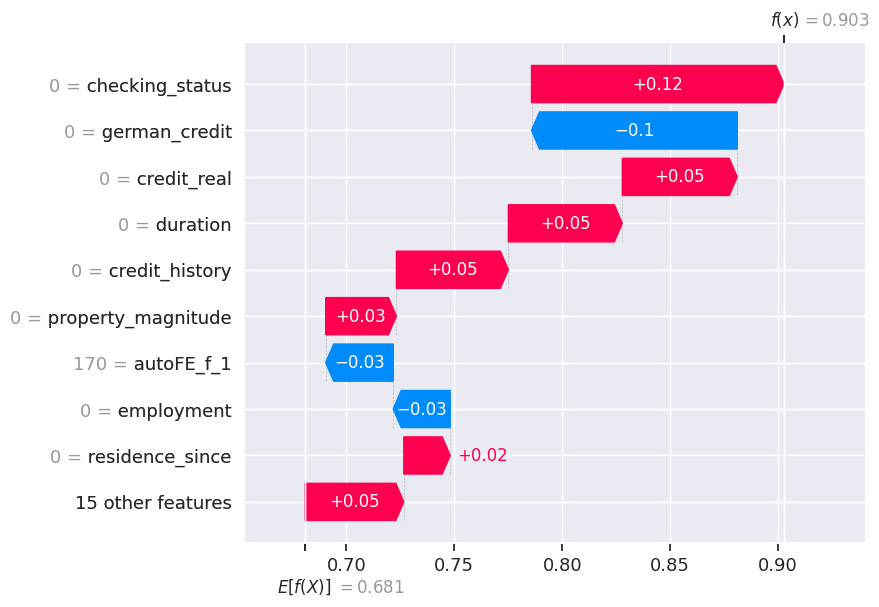

In [20]:
# 模型可解释性-单样本中特征对label的影响
shap.plots.waterfall(shap_values[0])

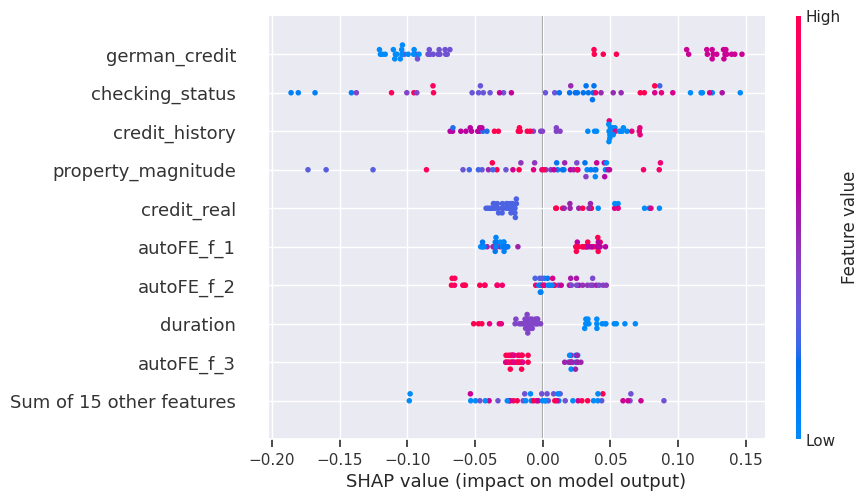

In [21]:
# 模型可解释性-多样本中特征对label的影响
shap.plots.beeswarm(shap_values[:50])

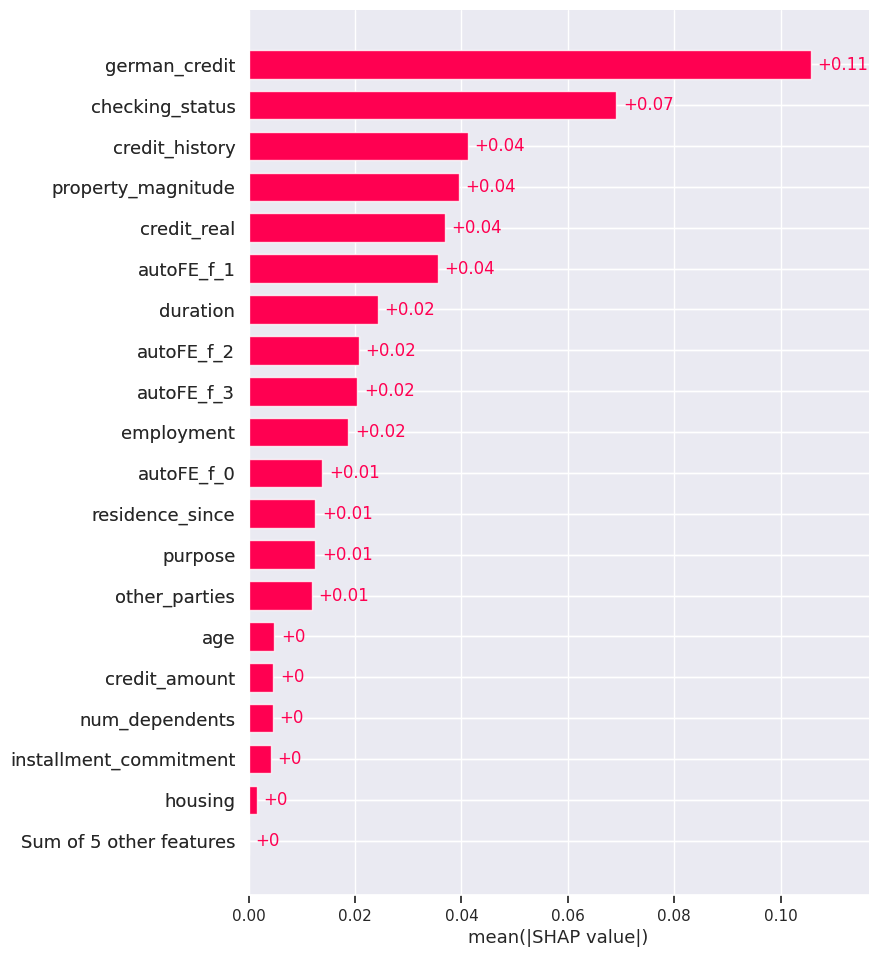

In [23]:
# 模型可解释性-特征重要性
shap.plots.bar(shap_values, max_display=20)